####**TITULO:** Evaluación de implemetanción de sistema CRM para la atención a la ciudadania. 


####**INDICE** 
1. [Introducción](#id1)
2. [Limipieza y exploración del datasets](#id2)
3. [Estadística descriptiva](#id3)
4. [Estado de la demanda al primer año de implementación](#id4)
5. [Calidad del servicio segun observaciones](#id5)
6. [Analisis cuantitativo de las observaciones](#id6)
7. [Auditoria de casos](#id7)
8. [Resultados finales y propuesta](#id8)




## **1. Introducción**<a name="id1"></a>

El siguente trababajo se propone evaluar el proceso de implementación del sistema CRM de Wise CX al SENASA a inicios del año 2022, para ofrecer a la ciudadania canales anteción mediante correo, chat online y Whatsapp. Este sistema permite la multicanalidad y omnicanlidad centrada en un solo sistema y a su vez permite herramientas como asistentes virtuales o chat bot. 

La evaluación propuesta no aborda cuestiones tecnicas del sistema, sino que se orienta a la calidad del servicio brindado y la respuesa a las demanda generada en la ciudadadania, quien ya esta habituada a comunciarse por estos medios. Algunas de las hipotesis o preguntas orientadoras son: 

**Pregunta fundamental**:

- ¿El nuevo servicio de atención era necesario?¿Cuál era su demanda real?

**Preguntas derivadas** (en caso de confirmarse la demanda):

- ¿Cuales son las consultas frecuentes? 
- ¿Cuál es la capacidad operativa de respuesta? 
- En relación a las principales variables de tiempo, tipo de consulta y extensión de la conversación ¿Que nivel de satifacción se detecta y cual es la calidad del servicio? 
- ¿Qué indicadores se pueden plantear para el 2023 para monitorear la calidad del servicio? 

El conjunto de datos corresponde a los datos exportados del sistema de reportes que genera Wise CX de todos los casos recepcionados para su atención primaria.

**Fuente y descripción de variables** - dato no publico,obtención propia del sistema CRM de Wise CX utilizado para la atención al publico por chat,correo y WhatsApp.

**Contexto comercial y analítico** - Las variables potenciales involucradas son las que permiten un analisis de la calidad recibida en la atención. Desde tiempo de gestión, encuestas, tipificaciones categoricas de los casos, etc. Todo esto permite automatizar el analisis y la deteccion de no conformidades. Es decir, no solo un analisis descriptivo, sino que tambien un control de calidad para emitir informes automatizables. 

**Contexto de implementación** - El sistema se aplico de forma reciente, por esto la serie temporal tiene como rango 1 año. Desde el cual tiene vigencia. Por esto es importante orientar el analisis de los datos para brindar un estado de implementación 

Finalemte, para llevar a cabo el trabajo se utilizara como recurso las librerias pertenecientes al lengaje de programación Phyton orientado a la ciencia de datos. Estas se exponen a continuación y luego se importan los datos:


In [3]:
#Importación de datos

from google.colab import drive

# Operaciones matematicas, manipulación y transformación de datos

from datetime import date, time, datetime
import numpy as np
import pandas as pd
import statistics as stats

# Visualización de graficos

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import plotly as py
import plotly.graph_objs as go
plt.style.use('fivethirtyeight')
mpl.style.use('bmh')
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Machine Learning

from sklearn import linear_model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
"""
Me concecto a mi Google Drive y importo el archivo Excel separado cada hoja de calculo que lo compone.

"""

drive.mount('/content/drive')

df_casos = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Actividades /Datos/Casos Wise/Casos_CRM_definitivo.xlsx',sheet_name=1)

df_encuestas = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Actividades /Datos/Casos Wise/Casos_CRM_definitivo.xlsx',sheet_name=0)



Mounted at /content/drive


##**2. Limipieza y exploración del datasets**<a name="id2"></a>


##**Limpieza del datasets**

El dataset a limpiar, para poder realizar la descripción de las variables de interés y la estadística descriptiva, es el de **df_casos**. En una primera instancias se puede ver columnas con nombres poco intuitivos para el analisis, como a su vez columnas con muchos valores nulos, lo cual indica que no hay datos significativos para su analisis. En el caso de **df_encuestas** esto no sucede. Tambien se transformaran datos de tiempo que estan en segundos y al ser valores muy grandes se convertiran a minutos. 

Como elemento ajenos al dataset original se crearan columnas que permitran el control de calidad planteado como objetivo del trabajo. Es decir, se automatizara el control de etiquetado como "observado" aquellas conversaciones donde la ciudadania abandona la conversación. A su vez se crearan columnas para poder confirmar si el caso se da por perdido sin posibilidad de recuperación para resolver la consulta sin respuesta. 

Otra transformación es la tificación de casos segun un filtrado de texto de aquellas conversaciones que no se tengan clasificadas. 

A su vez, para no copiar y pegar diferentes filtros o condiciones en los diferentes graficos. Esto se realizara en una sola sección de limpieza.

El resultado final sera el dataset **df_casos_final**, al cual luego solo se manipulara para realizar graficos y calculos. Pero la base de los datos siempre sera la misma. 

Las variables a obtener son las siguentes:
                                                              
- **Numero unico de caso**: Numero unico de conversación.Es decir un identificador unico o ID.
- **Canal**: La multicanalidad de la plataforma permite 3 tipos de conversaciones.Estas son chat en linea,correo y WhatsApp. 
- **Primer mensaje**: La primera oración que aparece cuando la persona conversa. 
- **Caso: Descripción**:Descripción de texto libre que el operador puede redactar para agregar información.
- **Usuario**:Indica que si la conversación fue atendida por el asistente virtual o mediante un operador humano. 
- **Fecha de creación**:Fecha y hora en que se creo la conversación.
- **Fecha primer cambio**:Fecha y hora en que hubo algun cmbio en la trazabilidad de la conversación.
- **Fecha asignación agente**: Fecha y hora en que se le asigno al operador una conversación.
- **Fecha de resolución**: Fecha y hora en que se cambio el estado de la conversación a resuelta.
- **Etiquetas**: Listado de sub-categorias pre-establecidas para agregar detalle a las tipificaciones.                                              - **Tipo**: Listado de categorias mas generales pre-establecidad para tipificar conversaciones.
- **Fecha primera respuesta**: Fecha y hora del primer mensaje enviado por el operador (no asistente virtual).
- **Fecha ultima respuesta**: Fecha y hora del ultimo mensaje enviado por el operador (no asistente virtual)      
-  **Cantidad de mensajes por conversación**: Cantidad de mensajes que tuvo la conversación. Ya sea con el asistente virtual o con el operador.                           
- **Correo ciudadano/a**: Correo que declara la persona al iniciar una conversación. Siempre es un dato obligatorio, proque permite la trazabilidad de conversaciones que tuvo.
- **Tiempo de espera asignación (en min)**: La cantidad total de minutos que espero la persona en ser atendido.Ya sea por el asistente virtual o por el operador luego. 
- **Tiempo de espera primera respuesta (en min)**: La cantidad total de minutos que que la persona espero entre que se asigno la conversación al operador y este le escribio el primer mensaje. 
- **Control de conversaciones**: Clasificación de la conversación como observada, porque la persona abandono la conversación porque disconformidad o porque nunca lo atendieron. Esto permite realizar su seguimiento y plantear un indicadro de recuperación o perdida de personas contactadas. 
- **Envio Correo**: Indica si la persona envio un correo. Esto se creo para saber si una persona que se comunico al chat o WhatsApp. Pero luego se clasifico como observado, se volvio a comunicar por correo (Ya que en estos casos siempre hay una automatización y plantilla a enviar por correo para que se comunique). 
- **Envio encuesta**: Indica si la persona envio una encuesta. Esto se creo para saber si una persona que se comunico al chat o WhatsApp. Pero luego se clasifico como observado, se volvio a comunicar por encuesta (Ya que en estos casos siempre hay una automatización y plantilla a enviar por correo para que se comunique). 
- **Realizo re-consulta**: Indica si la persona se volvio a comunicar mas de una vez. Esto se creo para saber si una persona que se comunico al chat o WhatsApp. Pero luego se clasifico como observado, se volvio a comunicar.
- **Número de serie**:Numero unico de encuesta.Es decir un identificador unico o ID.
- **Fecha de envio**: Fecha y hora en que envio la encuesta.      
- **Correo electrónico**: Unico dato de identificación requerido y que permite una retroalimentación en caso de queja.                        
- **¿Cuál fue tu canal de contacto con nosotros?**:Ademas de los canales incorporados a Wise CX esta el presencial y el telefonico.   
- **¿Cuál es tu opinión sobre la atención recibida?**: Respuesta categorica de "Debe mejorar significativamente" a "excelente" como ambos extremos.        
- **¿Cuál es tu opinión sobre la atención recibida?**:Respuesta categorica de "Debe mejorar significativamente" a "excelente" como ambos extremos.  
- **¿Obtuviste la información que buscabas?**: Respuesta categorica de "si" o "no". 
- **¿Tenés otros comentarios, sugerencias u observaciones sobre el servicio recibido?**: Campo libre de texto para dejar un breve comentario y en caso de disconformidad se genera una retroalimentación para continuar el caso. 

Para obtener estas variables se realizo la siguente limpieza:

In [4]:
"""  1) Eliminar y renombrar columnas """ 

df_casos_limpio1 = df_casos.drop(columns = ['Cliente Nombre','Estado','Site','Equipo','Caso: Sentiment','Caso: Canal/Cuenta','Caso: Last NPS','Bot Active','Bot Attended','Bot Resolved','Caso: AHT','Caso: Fecha Vto.','Caso: Fecha Cierre','Caso: Prioridad','Caso: SLA','Caso: Last Follow','Caso: Empresa','Cliente: Empresa','Cliente: Rol','Cliente: Teléfono','Cliente: ID Personal','Cliente: Domicilio','Cliente: Ciudad','Cliente: País','Cliente: Facebook','Cliente: Twitter','Cliente: Instagram','Empresa: Nombre','Empresa: Email','Empresa: Teléfono','Empresa: ID'], axis=1)
df_casos_limpio1.rename(columns = {'Caso: Canal': 'Canal'}, inplace = True)
df_casos_limpio1.rename(columns = {'#': 'Numero unico de caso'}, inplace = True)
df_casos_limpio1.rename(columns = {'subject': 'Primer mensaje'}, inplace = True)
df_casos_limpio1.rename(columns = {'Caso: Creado': 'Fecha de creación'}, inplace = True)
df_casos_limpio1.rename(columns = {'Caso: Actualizado': 'Fecha primer cambio'}, inplace = True)
df_casos_limpio1.rename(columns = {'Caso: Asignación': 'Fecha asignación agente'}, inplace = True)
df_casos_limpio1.rename(columns = {'Caso: Resuelta': 'Fecha de resolución'}, inplace = True)
df_casos_limpio1.rename(columns = {'Caso: Etiquetas': 'Etiquetas'}, inplace = True)
df_casos_limpio1.rename(columns = {'Caso: WT': 'Tiempo de espera asignación (en min)'}, inplace = True)
df_casos_limpio1.rename(columns = {'Caso: HT': 'Tiempo de espera primera respuesta (en min)'}, inplace = True)
df_casos_limpio1.rename(columns = {'Caso: RT': 'Tiempo de resolución del caso (en min)'}, inplace = True)
df_casos_limpio1.rename(columns = {'Caso: Primer Resp.': 'Fecha primera respuesta'}, inplace = True)
df_casos_limpio1.rename(columns = {'Caso: Última Resp.': 'Fecha ultima respuesta'}, inplace = True)
df_casos_limpio1.rename(columns = {'Caso: Mensajes': 'Cantidad de palabras por conversación'}, inplace = True)
df_casos_limpio1.rename(columns = {'Cliente: Email': 'Correo ciudadano/a'}, inplace = True)


"""  2) Filtramos y renombramos valores de registros """ 

df_casos_limpio1 = df_casos_limpio1.loc[df_casos_limpio1['Fecha de creación'].between('2022-01-01 01:01:49',
                                                                                      '2022-12-31 23:59:00')]
df_casos_limpio1.loc[df_casos_limpio1['Canal'] == 'WhatsApp Saliente', "Canal"] = "WhatsApp"
df_casos_limpio1.loc[df_casos_limpio1['Usuario'] == 'Asistente Virtual 2', "Usuario"] = "Asistente Virtual"
df_casos_limpio1 = df_casos_limpio1.replace('Asistente Virtual ',"Asistente Virtual") #Quedaba con un espacio y los tomaba como diferentes

""" 3) Las columnas de tiempo estan en segundos, se convierten en minutos 
para achicar los valores """ 

df_casos_limpio1 = pd.concat([df_casos_limpio1[['Numero unico de caso','Canal',
                                                'Primer mensaje','Caso: Descripción',
                                                'Usuario','Fecha de creación','Fecha primer cambio',
                                                'Fecha asignación agente','Fecha de resolución','Etiquetas',
                                                'Tipo','Fecha primera respuesta','Fecha ultima respuesta',
                                                'Cantidad de palabras por conversación','Correo ciudadano/a']] 
                              , round(df_casos_limpio1.loc[:,['Tiempo de espera asignación (en min)',
                                                              'Tiempo de espera primera respuesta (en min)',
                                                              'Tiempo de resolución del caso (en min)']]/60)], axis=1,)

""" 4) Se eliminan las filas de correos que no son casos reales,porque son correos 
internos o del proveedor.Se crea y aplica filtro. """

df_correos = df_casos_limpio1[['Correo ciudadano/a','Fecha de creación']] 
df_correos = df_correos[df_correos['Correo ciudadano/a'].str.contains(
    '@senasa.gob.ar|@wisecx.com.gob.ar', regex=True, na=True)]
lista_correos = df_correos['Correo ciudadano/a'].unique().tolist()

lista_correos.remove('mesadeayuda@senasa.gob.ar')
lista_correos.remove('mesageneral@senasa.gob.ar')
lista_correos.remove('denuncias@senasa.gob.ar')

valores_filtrados = lista_correos 

df_casos_limpio1 = df_casos_limpio1[~df_casos_limpio1['Correo ciudadano/a'].isin(valores_filtrados)]

""" 5) Filtro de la variedad de usuarios solo en 3 categorias, que sea bot, operados o sin asignar """ 

filtro_usuario = df_casos_limpio1['Usuario'].unique().tolist()
filtro_usuario.remove('[Sin Asignar]')
filtro_usuario.remove('Asistente Virtual')
df_casos_limpio1 = df_casos_limpio1.replace(filtro_usuario,"Operador") 


""" 6) Creo mediante una funcion con condicionales 2 columnas para control de calidad 
(para canal chat y WhatsApp)  y hago un LEFT JOIN con el data set de encuentas, que tiene un origen de datos 
diferente y por eso no sale del mismo reporte. """

def controldecalidad(x):
    if x['Usuario'] == '[Sin Asignar]' and x['Canal']!='Email Entrante':
        return 'Observado'
    elif x['Tipo'] == 'NO RECIBIDO' and x['Canal']!='Email Entrante':
        return 'Observado'
    elif x['Tipo'] == 'CHAT SUSPENDIDO' and x['Canal']!='Email Entrante':
        return 'Observado'
    elif x['Tipo'] == 'NO INFORMA TEMA' and x['Canal']!='Email Entrante':
        return 'Observado'
    elif x['Fecha primera respuesta'] is pd.NaT and x['Canal']!='Email Entrante':
        return 'Observado'
    else:
         return 'No observado' 

df_casos_limpio1['Control de conversaciones'] = df_casos_limpio1.apply(controldecalidad, axis=1) #AYUDA MEMORIA - Si se una axis=0 la iteración la realiza sobre todas las filas.  


# 7) Limipieza de datos de la columna "Tipo" donde hay muchas conversaciones sin tipificar

df_casos_limpio1 = df_casos_limpio1.replace('[Sin Tipo]','SIN TIPO')
df_casos_limpio1 = df_casos_limpio1.replace('DATO ABIERTO','INFO. PÚBLICA')
df_casos_limpio1 = df_casos_limpio1.replace('Bot','SIN TIPO')
df_casos_limpio1 = df_casos_limpio1.replace('Teléfono','SIN TIPO')
df_casos_limpio1['Tipo'].replace('Chat ','SIN TIPO')
df_casos_limpio1 = df_casos_limpio1.replace('ENVÍO CORREO ELECTRÓNICO','SIN TIPO')
df_casos_limpio1 = df_casos_limpio1.replace('Consultas/Solicitudes -> Extra Senasa','EXTRA SENASA')
df_casos_limpio1 = df_casos_limpio1.replace('Consultas/Solicitudes -> Consulta bibliográfica y/o normativa','CONSULTA NORMATIVA/BIBLIOGRAFICA')
df_casos_limpio1 = df_casos_limpio1.replace('Consultas/Solicitudes -> Consulta ciudadana','SIN TIPO')
df_casos_limpio1 = df_casos_limpio1.replace('Consultas/Solicitudes -> Trámites','SIN TIPO')
df_casos_limpio1 = df_casos_limpio1.replace('PROD. FITOSANITARIOS','AGROQUÍMICOS')
df_casos_limpio1 = df_casos_limpio1.replace('ALIMENTOS PARA ANIMALES','APROBACION DE PRODUCTOS')

# 8) Se recuperan tipificaciones de conversación a partir de la columna de "Caso: Descripción"

df_casos_limpio1['Caso: Descripción'] = df_casos_limpio1['Caso: Descripción'].fillna('SIN DESCRIPCIÓN') #Reemplazo los NaN por esa sola palabra
df_casos_limpio1['Caso: Descripción'] = df_casos_limpio1['Caso: Descripción'].str.upper()

"""
Esta función toma una columna y en refencia a una lista de valores reemplaza 
en la columna los valores por uno que yo le indique.
"""
def reemplazar_valores(df, columna, valores_lista, palabra_reemplazo): 
    df[columna] = df[columna].replace(valores_lista, palabra_reemplazo)
    return df

""" Creamos las listas para reemplazar luego en la columana. Se usa como 
criterio tratar de recuperar el mayor de conversaciones mas consultadas o mas
sensible para el Organismo de acuerdo a sus consultar frecuentes. Por ejemplo,
viajeros con mascotas o RENSPA"""

lista_mascotas = df_casos_limpio1[df_casos_limpio1['Caso: Descripción'].str.contains(
    'MASCOT|PERRO|LAZARETO|MSCOTA|TURNO|CVI|AUTOGEST|DCEA|VACUNA|AEROPAR|EZEI',regex=True, na=True)]
lista_mascotas = lista_mascotas ['Caso: Descripción'].tolist()

lista_capacitacion = df_casos_limpio1[df_casos_limpio1['Caso: Descripción'].str.contains(
    'ACREDI|CURSO|CAPACITA',regex=True, na=True)]
lista_capacitacion  = lista_capacitacion['Caso: Descripción'].tolist()

lista_trazabilidad = df_casos_limpio1[df_casos_limpio1['Caso: Descripción'].str.contains(
    'TRAZA',regex=True, na=True)]
lista_trazabilidad = lista_trazabilidad['Caso: Descripción'].tolist()

lista_aprobaciondeproductos = df_casos_limpio1[df_casos_limpio1['Caso: Descripción'].str.contains(
     'ALIMENTO|ENVASE|ADITI|ORGANIC|CRAA|COADYUV',regex=True, na=True)]
lista_aprobaciondeproductos = lista_aprobaciondeproductos['Caso: Descripción'].tolist()

lista_habilistaciondetransporte = df_casos_limpio1[df_casos_limpio1['Caso: Descripción'].str.contains(
     'TRANSPOR',regex=True, na=True)]
lista_habilistaciondetransporte = lista_habilistaciondetransporte['Caso: Descripción'].tolist()

lista_dtv = df_casos_limpio1[df_casos_limpio1['Caso: Descripción'].str.contains(
     'DTV',regex=True, na=True)]
lista_dtv  = lista_dtv['Caso: Descripción'].tolist()

lista_dte = df_casos_limpio1[df_casos_limpio1['Caso: Descripción'].str.contains(
     'DTE|CARAVAN|ANIMALES VIVOS',regex=True, na=True)]
lista_dte = lista_dte ['Caso: Descripción'].tolist()

lista_renspa = df_casos_limpio1[df_casos_limpio1['Caso: Descripción'].str.contains(
     'RENSPA|VIVER|AGRICULTURA FAMI|AFTOSA|AVE|APÍCO|APICO|APICU',regex=True, na=True)]
lista_renspa  = lista_renspa ['Caso: Descripción'].tolist()

lista_afidi = df_casos_limpio1[df_casos_limpio1['Caso: Descripción'].str.contains(
     'AFIDI',regex=True, na=True)]
lista_afidi  = lista_afidi['Caso: Descripción'].tolist()

lista_laboratorio = df_casos_limpio1[df_casos_limpio1['Caso: Descripción'].str.contains(
     'LABORAT',regex=True, na=True)]
lista_laboratorio = lista_laboratorio['Caso: Descripción'].tolist()

df_casos_limpio1 = reemplazar_valores(df_casos_limpio1, 'Caso: Descripción', lista_mascotas, 'TRASLADO MASCOTAS')
df_casos_limpio1 = reemplazar_valores(df_casos_limpio1, 'Caso: Descripción', lista_capacitacion, 'CAPACITACION')
df_casos_limpio1 = reemplazar_valores(df_casos_limpio1, 'Caso: Descripción', lista_trazabilidad, 'TRAZABILIDAD')
df_casos_limpio1 = reemplazar_valores(df_casos_limpio1, 'Caso: Descripción', lista_aprobaciondeproductos, 'APROBACION DE PRODUCTOS')
df_casos_limpio1 = reemplazar_valores(df_casos_limpio1, 'Caso: Descripción', lista_habilistaciondetransporte, 'HABILITACION DE TRANSPORTE')
df_casos_limpio1 = reemplazar_valores(df_casos_limpio1, 'Caso: Descripción', lista_dtv, 'DTV')
df_casos_limpio1 = reemplazar_valores(df_casos_limpio1, 'Caso: Descripción', lista_dte, 'DTE')
df_casos_limpio1 = reemplazar_valores(df_casos_limpio1, 'Caso: Descripción', lista_renspa, 'RENSPA')
df_casos_limpio1 = reemplazar_valores(df_casos_limpio1, 'Caso: Descripción', lista_afidi, 'AFIDI')
df_casos_limpio1 = reemplazar_valores(df_casos_limpio1, 'Caso: Descripción', lista_laboratorio , 'LABORATORIO')

""" Reemplazamos los valores modificados en la columna "Descripción: Caso" en la 
columna "Tipo" filtrando en aquellos registros que sean "SIN TIPO" """ 

df_casos_limpio1.loc[df_casos_limpio1['Tipo'] == 'SIN TIPO', 'Caso: Descripción'] = df_casos_limpio1.loc[df_casos_limpio1['Tipo'] == 'SIN TIPO', 'Tipo']

""" 9) Se realizan multiples joins o relaciónes:

El principal join o relación es con la otra hoja del archivo Excel donde estan 
las encuestas. Luego de los mismos datos del reporte de conversaciones se filtran 
3 data frame a los fines de control recuperación de aquellas conversaciones que
se observaron por alguna problematica:

1- merged_df1: La primera son todo/a ciudadana/o que envio un correo ademas 
del chat o whatsapp
observado.

2- merged_df2: La segunda son todo/a ciudadana/o que envio una encuesta ademas 
del chat o whatsapp observado.

3- merged_df3: La segunda son todo/a ciudadana/o que envio se volvio a comunicar 
ademas del chat o whatsapp observado.

Luego los 3 merge_df se relacionaron al df_casos_final que seria el data frame
final con el que se realizan todos los demas analisis posteriores.  

"""
#Tabla principal

df_casos_final = pd.merge(left=df_casos_limpio1,right=df_encuestas, how='left', left_on='Correo ciudadano/a', right_on='Correo electrónico') #AYUDA MEMORIA - En caso de haber querido traer solo algunas columnas lo detallo al final de parantesis como [['Numero de serie']]

# Tablas auxiliares a vincular en observados

df_enviocorreo = df_casos_limpio1[['Canal','Correo ciudadano/a']]
filtro_soloemail = df_enviocorreo['Canal'] == 'Email Entrante' 
df_enviocorreo = df_enviocorreo[filtro_soloemail]

merged_df1 = pd.merge(left=df_casos_limpio1[df_casos_limpio1['Control de conversaciones'] == 'Observado'],right=df_enviocorreo, how='left', left_on='Correo ciudadano/a', right_on='Correo ciudadano/a')
merged_df1 = merged_df1[['Numero unico de caso','Canal_y']]
merged_df1.rename(columns = {'Canal_y': 'Envio Correo'}, inplace = True)
merged_df1 = merged_df1.replace('Email Entrante','si')

df_envioencuesta = df_encuestas[['Número de serie','Correo electrónico']]
merged_df2 = pd.merge(left=df_casos_limpio1[df_casos_limpio1['Control de conversaciones'] == 'Observado'],right=df_envioencuesta, how='left', left_on='Correo ciudadano/a', right_on='Correo electrónico')
merged_df2 = merged_df2[['Numero unico de caso','Número de serie']]
merged_df2.rename(columns = {'Número de serie': 'Envio encuesta'}, inplace = True)


df_cant_agrupada = df_casos_limpio1.groupby('Correo ciudadano/a').size()
df_cant_agrupada = df_cant_agrupada.apply(lambda x: 'si' if x > 1 else 'NaN')
df_cant_agrupada = df_cant_agrupada .to_frame(name="numbers").reset_index(drop=False)
merged_df3 = pd.merge(left=df_casos_limpio1[df_casos_limpio1['Control de conversaciones'] == 'Observado'],right=df_cant_agrupada, how='left', left_on='Correo ciudadano/a', right_on='Correo ciudadano/a')
merged_df3 = merged_df3[['Numero unico de caso','numbers']]
merged_df3.rename(columns = {'numbers': 'Realizo re-consulta'}, inplace = True)

# Relación o join final con el data frame principal 

df_casos_final = pd.merge(left=df_casos_final,right=merged_df1, how='left', left_on='Numero unico de caso', right_on='Numero unico de caso') 
df_casos_final = pd.merge(left=df_casos_final,right=merged_df2, how='left', left_on='Numero unico de caso', right_on='Numero unico de caso') 
df_casos_final = pd.merge(left=df_casos_final,right=merged_df3, how='left', left_on='Numero unico de caso', right_on='Numero unico de caso') 

""" 10) Verificamos que luego del LEFT JOIN no tengamos filas duplicadas mediante:
 df_casos_final['Numero de caso'].duplicated().sum() """

df_casos_final.drop_duplicates(subset=['Numero unico de caso'],inplace=True)
df_casos_final.rename(columns = {'Submitted Time': 'Fecha de envio'}, inplace = True)

""" Volvemos a verificar y da cero """ 

df_casos_final['Numero unico de caso'].duplicated().sum()



0

In [6]:
#Se puede descargar,en formato Excel, el dataset final limpiado desde aqui.

df_casos_final.to_excel('df_casos_final.xlsx')

##**Exploración de encuestas de satisfacción**

In [ ]:
#Indica la cantidad de filas y columnas

df_encuestas.shape


(1175, 8)

In [ ]:
#Muestra las primera 10 filas del dataset

df_encuestas.head(10)

,Número de serie,Submitted Time,Correo electrónico,¿Cuál fue tu canal de contacto con nosotros?,¿Cuál es tu opinión sobre la atención recibida?,¿Cuál es tu opinión en relación al tiempo que insumió la consulta?,¿Obtuviste la información que buscabas?,"¿Tenés otros comentarios, sugerencias u observaciones sobre el servicio recibido?"
0,201,2022-01-04 11:39:59,acruz@viafrutta.com.ar,NaN,Excelente,Muy buena,Si,NaN
1,202,2022-01-10 12:33:29,molinaj2015@hotmail.com,NaN,Excelente,Muy buena,Si,NaN
2,203,2022-01-10 12:59:16,mai_oller@hotmail.com,NaN,Excelente,Excelente,Si,NaN
3,204,2022-01-10 13:03:38,guadalupe_gta@hotmail.com,NaN,Regular,Buena,No,NaN
4,205,2022-01-11 12:33:59,licitaciones@grupovalber.com.ar,NaN,Excelente,Excelente,Si,"Muy expeditiva y clara Julieta, que atendió la..."
5,206,2022-01-11 18:15:42,ale.biblio18@gmail.com,NaN,Debe mejorar significativamente,Debe mejorar significativamente,No,Me harté llenando una ficha más de media hora ...
6,207,2022-01-12 12:11:39,cristinajoelson@gmail.com,NaN,Excelente,Excelente,Si,la atención fue muy cordial y rápidamente me o...
7,208,2022-01-12 13:41:25,ecastro@caecv.com,NaN,Muy buena,Excelente,Si,NaN
8,209,2022-01-12 16:53:01,maximiliano@elbozalsrl.com.ar,NaN,Muy buena,Muy buena,Si,NaN
9,210,2022-01-13 11:21:07,rominamontiel81@hotmail.com,NaN,Muy buena,Muy buena,Si,No


In [ ]:
#Cuenta todos los nulos segun cada columna

df_encuestas.isna().sum().sort_values(ascending = False)

¿Tenés otros comentarios, sugerencias u observaciones sobre el servicio recibido?    589
¿Cuál fue tu canal de contacto con nosotros?                                          61
¿Cuál es tu opinión en relación al tiempo que insumió la consulta?                    14
¿Obtuviste la información que buscabas?                                                9
¿Cuál es tu opinión sobre la atención recibida?                                        8
Número de serie                                                                        0
Submitted Time                                                                         0
Correo electrónico                                                                     0
dtype: int64

In [ ]:
#Realiza un bucle for donde cuenta el total de veces que aparece un registro de cada columna

for columns in df_encuestas:
   print(df_encuestas[columns].value_counts()) 

201     1
973     1
989     1
988     1
987     1
       ..
592     1
591     1
590     1
589     1
1375    1
Name: Número de serie, Length: 1175, dtype: int64
2022-01-04 11:39:59    1
2022-12-13 10:45:23    1
2022-12-14 12:26:42    1
2022-12-14 12:25:45    1
2022-12-14 11:23:27    1
                      ..
2022-10-11 18:06:19    1
2022-10-11 14:35:50    1
2022-10-11 14:24:22    1
2022-10-11 14:04:58    1
2023-01-31 21:37:14    1
Name: Submitted Time, Length: 1175, dtype: int64
abaigun@yahoo.com.ar           4
martasegura00@gmail.com        4
natali_r_g@hotmail.com         4
karimaxi26@gmail.com           3
gustavo.sarzano@gmail.com      3
                              ..
nbharadwaj@fcfindia.in         1
analucasbrudan@gmail.com       1
licledesmanatalia@gmail.com    1
mercedestarqui@hotmail.com     1
hernan198444@gmail.com         1
Name: Correo electrónico, Length: 1081, dtype: int64
Chat online (de 9 a 17 horas)                 535
Correo electrónico                            201


In [ ]:
#Describe cada columna de dataset

df_encuestas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype         
---  ------                                                                             --------------  -----         
 0   Número de serie                                                                    1175 non-null   int64         
 1   Submitted Time                                                                     1175 non-null   datetime64[ns]
 2   Correo electrónico                                                                 1175 non-null   object        
 3   ¿Cuál fue tu canal de contacto con nosotros?                                       1114 non-null   object        
 4   ¿Cuál es tu opinión sobre la atención recibida?                                    1167 non-null   object        
 5   ¿Cuál es tu opinión en relación al tiempo que insumió la

##**Exploración de reporte de conversaciones unificado con encuestas**

In [ ]:
#Describe cada columna de dataset

df_casos_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28827 entries, 0 to 30547
Data columns (total 30 columns):
 #   Column                                                                             Non-Null Count  Dtype         
---  ------                                                                             --------------  -----         
 0   Numero unico de caso                                                               28827 non-null  int64         
 1   Canal                                                                              28827 non-null  object        
 2   Primer mensaje                                                                     28143 non-null  object        
 3   Caso: Descripción                                                                  28827 non-null  object        
 4   Usuario                                                                            28827 non-null  object        
 5   Fecha de creación                                    

In [5]:
#Muestra las primera 10 filas del dataset

df_casos_final.head(10)

,Numero unico de caso,Canal,Primer mensaje,Caso: Descripción,Usuario,Fecha de creación,Fecha primer cambio,Fecha asignación agente,Fecha de resolución,Etiquetas,...,Fecha de envio,Correo electrónico,¿Cuál fue tu canal de contacto con nosotros?,¿Cuál es tu opinión sobre la atención recibida?,¿Cuál es tu opinión en relación al tiempo que insumió la consulta?,¿Obtuviste la información que buscabas?,"¿Tenés otros comentarios, sugerencias u observaciones sobre el servicio recibido?",Envio Correo,Envio encuesta,Realizo re-consulta
0,30404,Email Entrante,NATALIA CASTILLO. OMICIDIO in COLOMBIA per FRE...,SIN TIPO,Operador,2022-01-01 01:01:49,2022-01-04 01:31:04,2022-01-03 10:05:59,2022-01-04 01:31:04,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30406,Email Entrante,CVI,SIN TIPO,Operador,2022-01-01 17:39:39,2022-01-04 18:46:05,2022-01-01 17:39:39,2022-01-04 18:46:05,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30408,Email Entrante,Consulta:,SIN TIPO,Operador,2022-01-01 23:42:08,2022-01-04 23:46:04,2022-01-03 10:06:00,2022-01-04 23:46:04,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30409,Email Entrante,APPELLO ADUP : Piano per SOSTITUZIONE ANIMALI ...,SIN TIPO,Operador,2022-01-02 00:27:32,2022-01-05 00:31:03,2022-01-03 10:06:00,2022-01-05 00:31:03,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30410,Email Entrante,MJD-OFI21-0048904 - 31 diciembre 2021 (EMAIL C...,SIN TIPO,Operador,2022-01-02 01:23:43,2022-01-05 01:31:03,2022-01-03 13:27:39,2022-01-05 01:31:03,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,30412,Email Entrante,consulta,SIN TIPO,Operador,2022-01-02 10:20:22,2022-01-05 10:31:07,2022-01-03 13:27:39,2022-01-05 10:31:07,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30414,Email Entrante,error en la pagina,SIN TIPO,Operador,2022-01-02 13:53:36,2022-01-05 14:01:06,2022-01-04 09:02:11,2022-01-05 14:01:06,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,30415,Email Entrante,Consulta de viaje con reptil,SIN TIPO,Operador,2022-01-02 14:21:13,2022-01-05 14:31:05,2022-01-04 09:02:11,2022-01-05 14:31:05,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,30421,Email Entrante,consulta urgente,SIN TIPO,Operador,2022-01-02 20:47:57,2022-01-05 21:01:03,2022-01-04 10:27:55,2022-01-05 21:01:03,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,30424,Email Entrante,Consulta de requisitos para viajar con mi masc...,SIN TIPO,[Sin Asignar],2022-01-02 23:58:05,2022-01-06 00:01:05,NaT,2022-01-06 00:01:05,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Indica la cantidad de filas y columnas

df_casos_final.shape

(28827, 30)

In [ ]:
#Realiza un bucle for donde cuenta el total de veces que aparece un registro de cada columna

for columns in df_casos_final:
   print(df_casos_final[columns].value_counts()) 

 

30404    1
55841    1
55803    1
55802    1
55801    1
        ..
43027    1
43026    1
43025    1
43024    1
66463    1
Name: Numero unico de caso, Length: 28827, dtype: int64
Chat              19966
Email Entrante     7065
WhatsApp           1796
Name: Canal, dtype: int64
Usted est&aacute  chateando con Asistente Virtual    6396
Usted est&aacute  chateando con Sergio               5875
Consulta                                              582
Hola!                                                 381
Hola                                                  319
                                                     ... 
Ingreso de animal                                       1
Consulta lavado camiones                                1
Oficio expte. FBB 6144/2022                             1
ERROR COMPROBANTE DE PAGO                               1
VIAJO CON MI PERRO A PARAGUAY                           1
Name: Primer mensaje, Length: 10800, dtype: int64
SIN TIPO                 21039
SIN DE

In [ ]:
#Cuenta todos los nulos segun cada columna

 df_casos_final.isna().sum().sort_values(ascending = False) 

Envio encuesta                                                                       28264
Fecha ultima respuesta                                                               28137
¿Tenés otros comentarios, sugerencias u observaciones sobre el servicio recibido?    27901
¿Cuál fue tu canal de contacto con nosotros?                                         27151
¿Cuál es tu opinión en relación al tiempo que insumió la consulta?                   27067
¿Cuál es tu opinión sobre la atención recibida?                                      27053
¿Obtuviste la información que buscabas?                                              27049
Fecha de envio                                                                       27045
Correo electrónico                                                                   27045
Número de serie                                                                      27045
Envio Correo                                                                         26917

##**3. Estadística descriptiva**<a name="id3"></a>


In [ ]:
df_casos_final.describe()

,Numero unico de caso,Cantidad de palabras por conversación,Tiempo de espera asignación (en min),Tiempo de espera primera respuesta (en min),Tiempo de resolución del caso (en min),Número de serie,Envio encuesta
count,28827.000000,28827.000000,28827.000000,28827.000000,28827.000000,1782.000000,563.000000
mean,49128.039650,4.723697,158.942935,72.635689,1763.209630,691.016835,808.699822
std,10540.348202,7.767997,678.879225,179.549307,8779.933761,268.653742,216.854143
min,30404.000000,0.000000,0.000000,0.000000,0.000000,201.000000,201.000000
25%,39905.500000,0.000000,0.000000,0.000000,12.500000,458.000000,688.500000
50%,49431.000000,0.000000,0.000000,4.000000,1442.000000,723.500000,828.000000
75%,58520.000000,7.000000,0.000000,18.000000,1451.000000,909.000000,980.000000
max,66463.000000,118.000000,8632.000000,2893.000000,194638.000000,1364.000000,1337.000000


In [ ]:
filtro = (df_casos_final['Tiempo de espera asignación (en min)']< 60) & (df_casos_final['Tiempo de espera primera respuesta (en min)']< 60) & (df_casos_final['Tiempo de resolución del caso (en min)']< 60)
df_casos_filtrado_estadistica = df_casos_final[filtro]
df_casos_filtrado_estadistica.describe()

,Numero unico de caso,Cantidad de palabras por conversación,Tiempo de espera asignación (en min),Tiempo de espera primera respuesta (en min),Tiempo de resolución del caso (en min),Número de serie,Envio encuesta
count,11338.000000,11338.000000,11338.000000,11338.000000,11338.000000,796.000000,147.000000
mean,48047.971600,4.919210,0.360469,8.437202,12.975481,605.610553,826.108844
std,10339.427744,8.943739,2.406472,8.635983,11.884909,283.326847,215.676449
min,30427.000000,0.000000,0.000000,0.000000,0.000000,201.000000,310.000000
25%,38915.750000,0.000000,0.000000,3.000000,5.000000,351.000000,739.500000
50%,48039.500000,0.000000,0.000000,6.000000,9.000000,554.000000,842.000000
75%,57055.750000,7.000000,0.000000,12.000000,17.000000,846.000000,1015.000000
max,66462.000000,118.000000,55.000000,59.000000,59.000000,1353.000000,1175.000000


####**INTERPRETACIÓN:**

Surge la necesidad de filtar un rango de de 0 a 60 minutos. Ya que mediante la 
tabla anterior y los altos valores de los promedios.

Al filtrar los paramatreos de minutos se aseguro un mejor resultado estadistico. Pero se redujo el tamaño de registros a la mitad. Esta primer detección da cuenta de la calidad de lo datos ingresados y de la necesidad de mejorar los aspectos operativos de registros al momentos de dar respuesta o cerrar las conversaciones. 

Respecto a los resultados obtenidos se puede establecer que:

- Los promedios elevados es del tiempo de resolución y de priemra respuesta.En el caso del primero donde se tiene a la persona conversando mucho tiempo. Estando concetrada las cantidades en el segundo y tercer percentil  de mayor duración. Los mismo sucede con el tiempo de primera respuesta en donde la persona no tiene respuesta. Es decir, no se esta teniendo la capacidad de respuesta. 

- Respecto  la desviación estándar, la misma varia segun la variable. Pero la mas cercana a cero (osea un valor bajo agrupado a la su promedio) es la del tiempo de asignación. En lo otros casos la desviación estándar es mayor que su promedio. Por lo tanto significa dispersión. 

En conclusión se manifiesto el problema de valores muy elevados y a su vez datos dispersos por falla de los operadores. Ya el unico caso sin problemas en sus registros es el tiempo de espera, el cual a mitad de año siempre atendia el asistente virtual. 

##**4. Estado de situación primer año de implementación**<a name="id4"></a>

##**Evolución anual de conversaciones 2022**

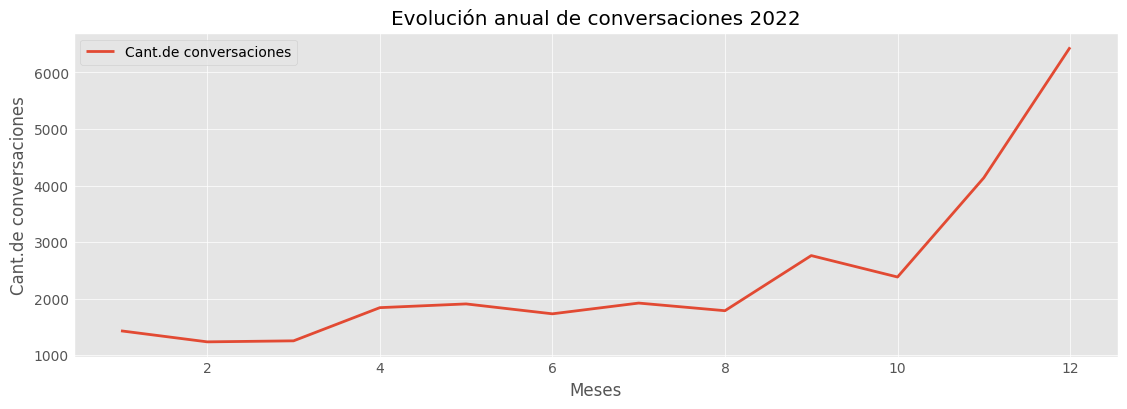

In [12]:
df_graf_linea = df_casos_final[['Fecha de creación' ,'Canal']] 
df_graf_linea.index = df_graf_linea['Fecha de creación'].dt.month
df_graf_linea = df_graf_linea.drop('Fecha de creación', axis='columns')

x_fecha = df_graf_linea.index.unique()
y_cantidad = df_graf_linea.groupby([df_graf_linea.index]).size()
y_cantidad

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x_fecha, y_cantidad, label='Cant.de conversaciones')
ax.set_xlabel('Meses')                  
ax.set_ylabel('Cant.de conversaciones')
ax.set_title('Evolución anual de conversaciones 2022')
ax.legend() 

####**INTERPRETACIÓN:**

El siguente grafico visualiza la evolución historica del primer año de implemetación del CRM de Wise CX para la atención al publico. En este primer año se ve como hubo un crecimiento sostenido y como se genero un pico entre el mes 10 y 12 donde la altama demanda de esos meses se enfoco en este sistema, aceptando su uso para remitir su consulta.

##**Segmentación de cantidad de conversaciones segun canal**

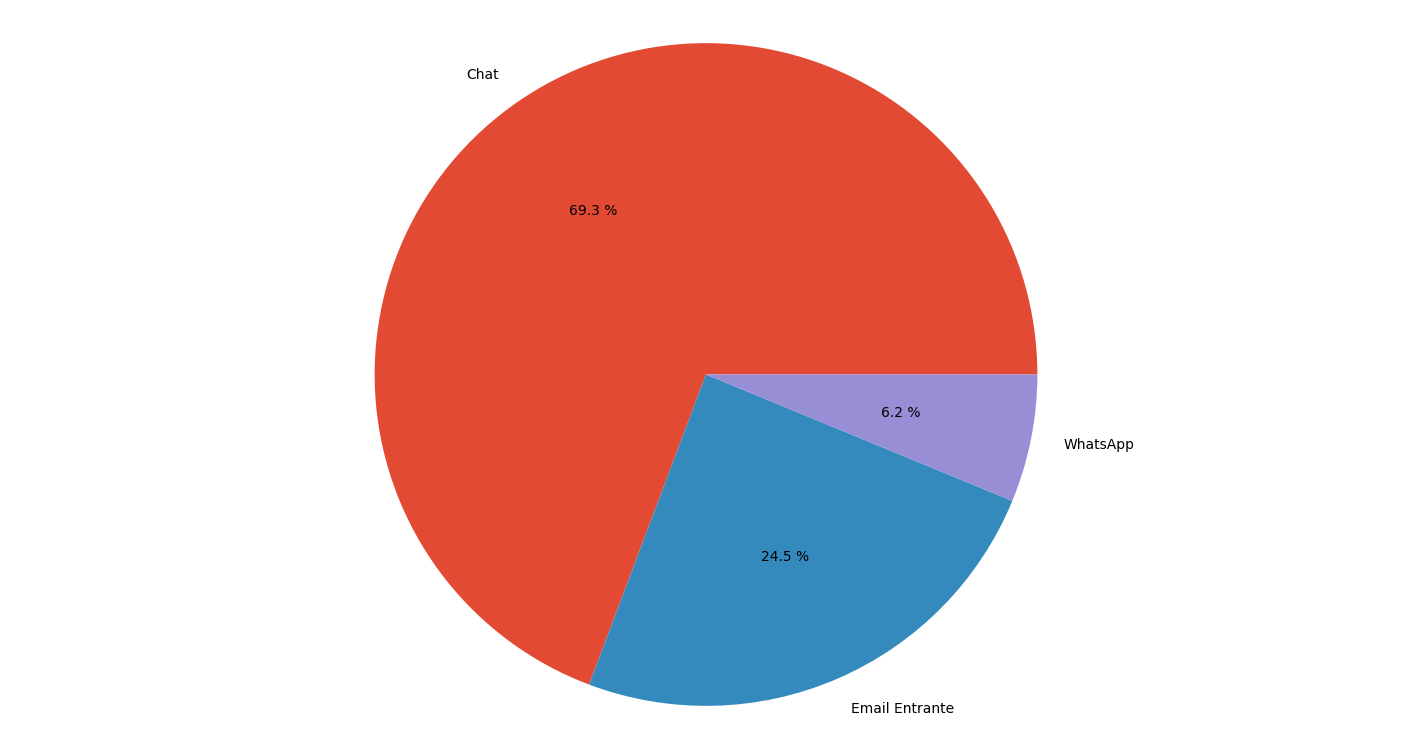

In [13]:

df_graf_circular = df_casos_final[['Fecha de creación' ,'Canal']] 
df_graf_circular.index = df_graf_circular['Canal']
df_graf_circular = df_graf_circular.drop(['Fecha de creación','Canal'], axis='columns')

x = df_graf_circular.index.unique()
y = df_graf_circular.groupby(['Canal']).size()   
y

plt.pie(y, labels=y.index, autopct="%0.1f %%")
plt.axis("equal")
plt.show()


####**INTERPRETACIÓN:**

El siguente grafico visualiza como distribuye en 3 segmentos los canales atendidos. En donde predomina el chat en linea y el Whatsapp como cuestion favorable. Ya que estos canales son mas fluidos y permiten una mejor comunicación. Sin embargo, surge la particularidad que Whatsapp se encuentra muy bajo en su porcentaje, siendo este canal el mas practico por tenerlo agendado en el telefono y no tener que ingresar a ninguna pagina. Como tampoco gastar muchos datos. 

En consecuencia se sugerira enfocar la campaña de difusion en alentar el uso de este canal y seguir reduciendo el correo. 

##**Cantidad de conversaciones segun tipo de usuario**

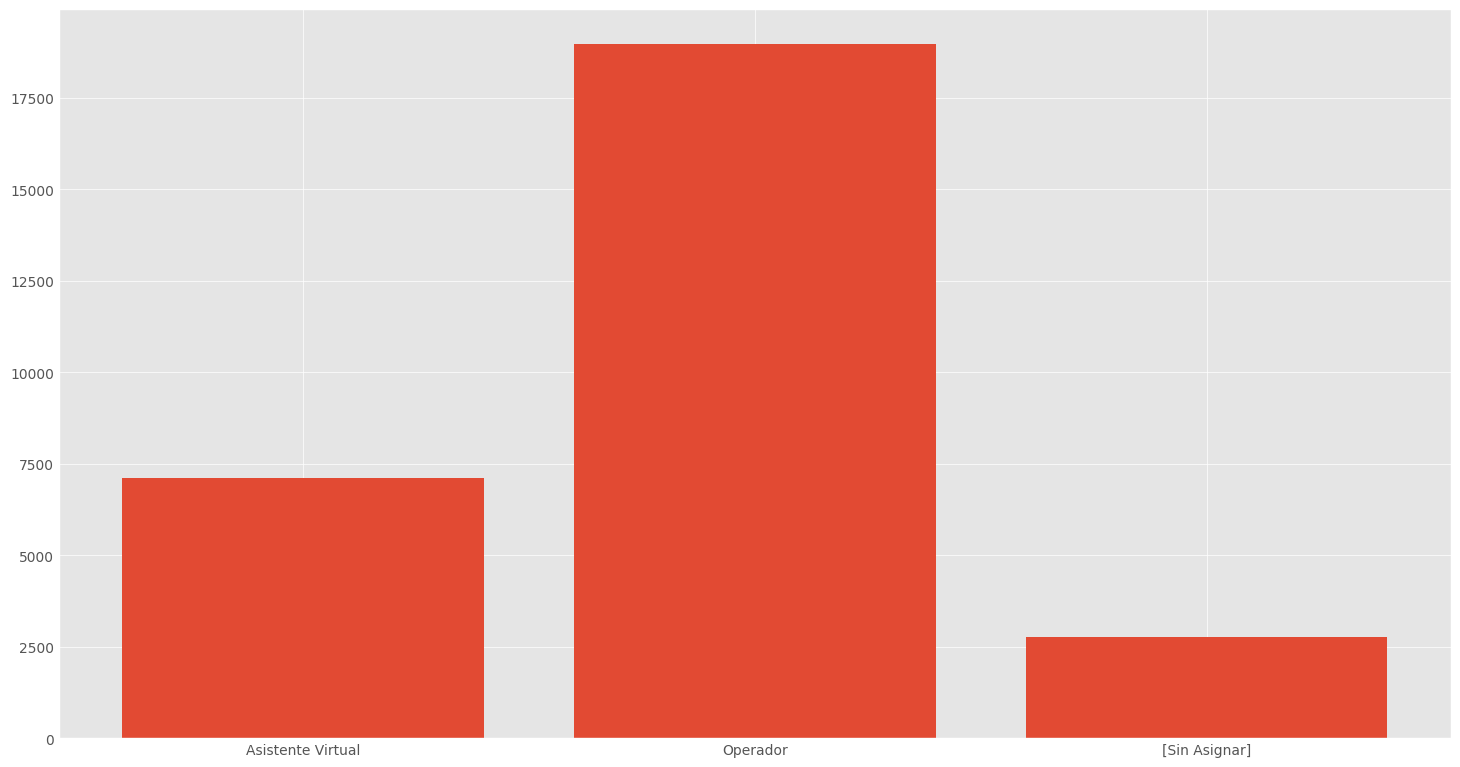

In [14]:
df_graf_barra = df_casos_final[['Usuario','Canal']]
x = df_graf_barra.index.unique()
y = df_graf_barra.groupby(['Usuario']).size()   
y

plt.bar(y.index, y)
plt.show()

####**INTERPRETACIÓN:**

El siguente grafico visualiza la comparación entre las conversaciones de chat y Whatsapp resueltas por solo el asistente virtual y las que se nesecito la ayuda de un operador. Aunque la necesidad de un operador supera en cantidad al asistente virtual, este igualmente esta mas de la mitad del total de conversaciones. En todo caso se sugire para futuros analisis explorar en que tematicas la información del asistente virtual no alcanzo. Para luego sugerir modificaciones.

En el caso del tipo "Sin asignar" que se dejo al momento de limipiar los datos. Se ve como la cantidad asciende a mas de 2000 conversaciones. Es decir, ya es una de las causas de los valores atipicos encontrados en el momento descriptivo de las estadisticas. 

##**Frecuencia de la demanda de conversaciones por horario**

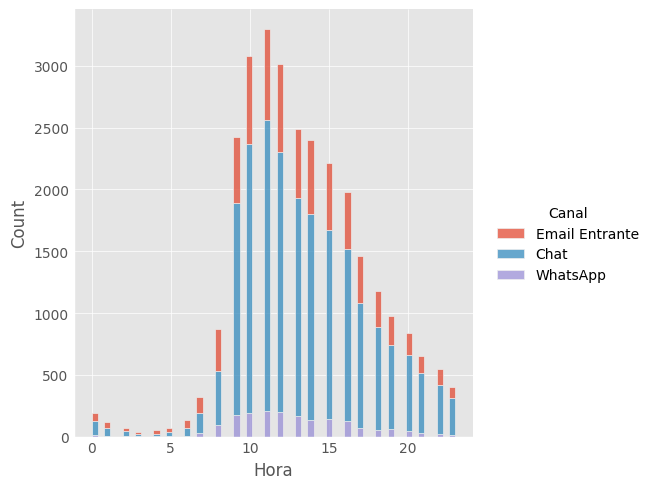

In [15]:
df_graf_histo = df_casos_final[['Fecha de creación' ,'Canal']] 
df_graf_histo.insert(loc = 0 , column = 'Hora', value = df_graf_histo['Fecha de creación'].dt.hour)
df_graf_histo = df_graf_histo.drop('Fecha de creación', axis='columns')
sns.displot(data=df_graf_histo, x="Hora", hue="Canal", multiple="stack")

####**INTERPRETACIÓN:**

El siguente grafico visualiza la distribución de frecuencias segun la hora en que ingresan los casos. De este modo se puede realizar una estimación de las necesidades operativas en las franjas horarias de mayor demandas. La cual en los 3 canales se durante el mediodia/tarde dentro del horario oficial de atención. 

##**Evolución comparativa entre "primer contacto" y "contacto totales"**

In [16]:
df_casos_final2 = df_casos_final[['Fecha de creación' ,'Correo ciudadano/a']] 
df_casos_final2.index = df_casos_final2['Fecha de creación'].dt.month
df_casos_final2 = df_casos_final2.drop('Fecha de creación', axis='columns')

df_conteo_distintivo = df_casos_final2.groupby('Fecha de creación')['Correo ciudadano/a'].nunique() 
df_conteo_total =df_casos_final2.groupby('Fecha de creación').size() 
df_primera_comunicacion = df_casos_final2.drop_duplicates(subset=['Correo ciudadano/a']).groupby('Fecha de creación')['Correo ciudadano/a'].nunique() 

df_union_series=pd.concat([df_conteo_total,df_primera_comunicacion],axis=1)
df_union_series.rename(columns = {'Correo ciudadano/a': 'Cant.nuevos clientes'}, inplace = True)
df_union_series.rename(columns = {0 : 'Cant.total de conversaciones'}, inplace = True)


df_union_series

,Cant.total de conversaciones,Cant.nuevos clientes
Fecha de creación,,
1,1430,1125
2,1235,949
3,1253,979
4,1840,1297
5,1906,1389
6,1731,1201
7,1921,1315
8,1786,1232
9,2761,1923


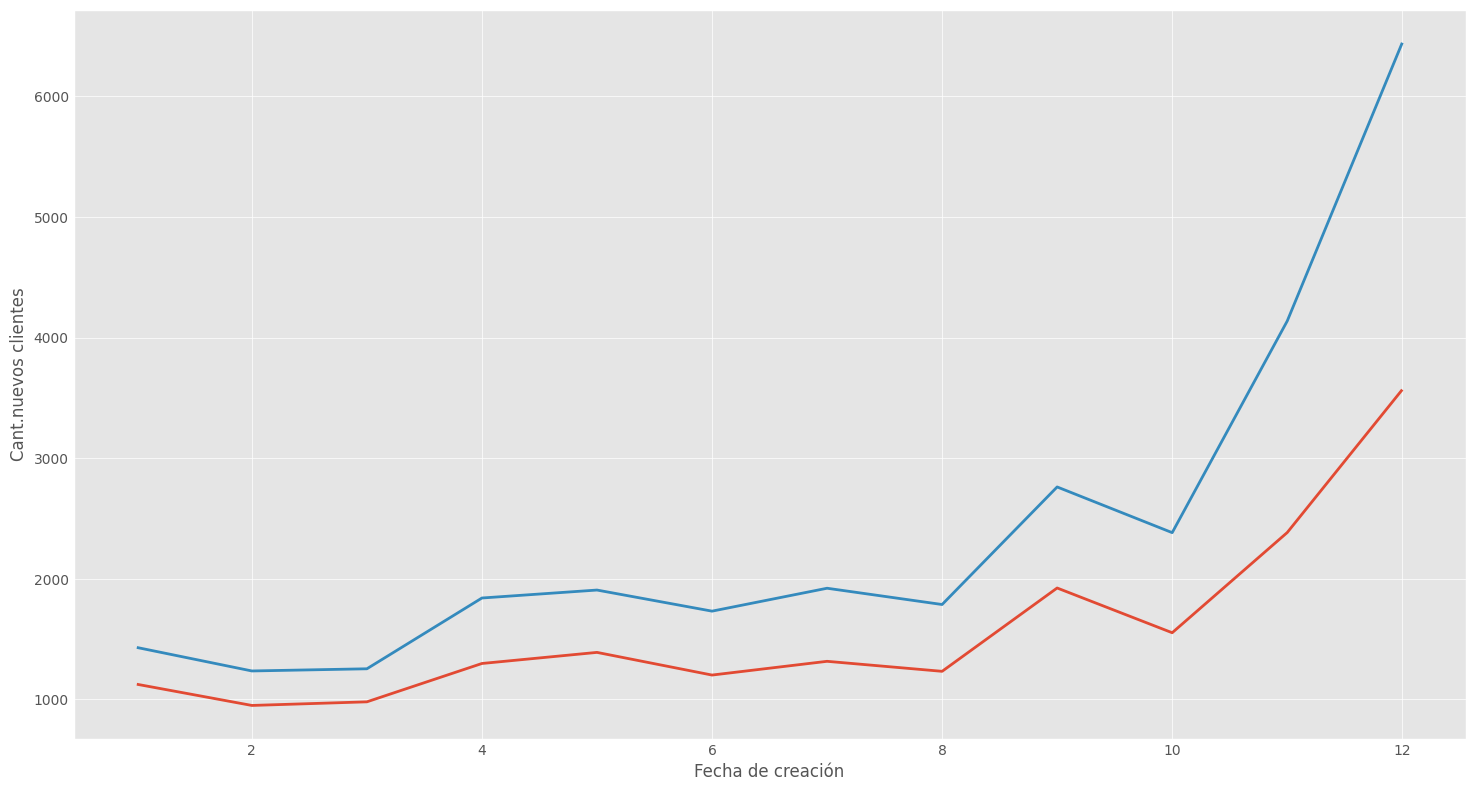

In [17]:
sns.lineplot(x = 'Fecha de creación' , y = 'Cant.nuevos clientes', data = df_union_series);
sns.lineplot(x = 'Fecha de creación' , y = 'Cant.total de conversaciones', data = df_union_series);

####**INTERPRETACIÓN:**

El siguente grafico visualiza la evolución historica de la cantidad totales de casos (en rojo) y los nuevos usarios (en azul) mes a mes que utilizan el servicio. 

Ambas lineas van en paralelo y tienen las misma tendencia. Lo cual demuestra como la difusion y el uso es creciente. Ademas la brecha entre ambas no amplia. Es decir, no hay altos indices de re consulta que haga que la eprsona se comunico muchas veces porque no se le explico bien. Esta brecha solo se amplia en el mes de diciembre en que hubo una alta demanda. 

##**Sumatoria de las variables categoricas de las encuestas**

In [19]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

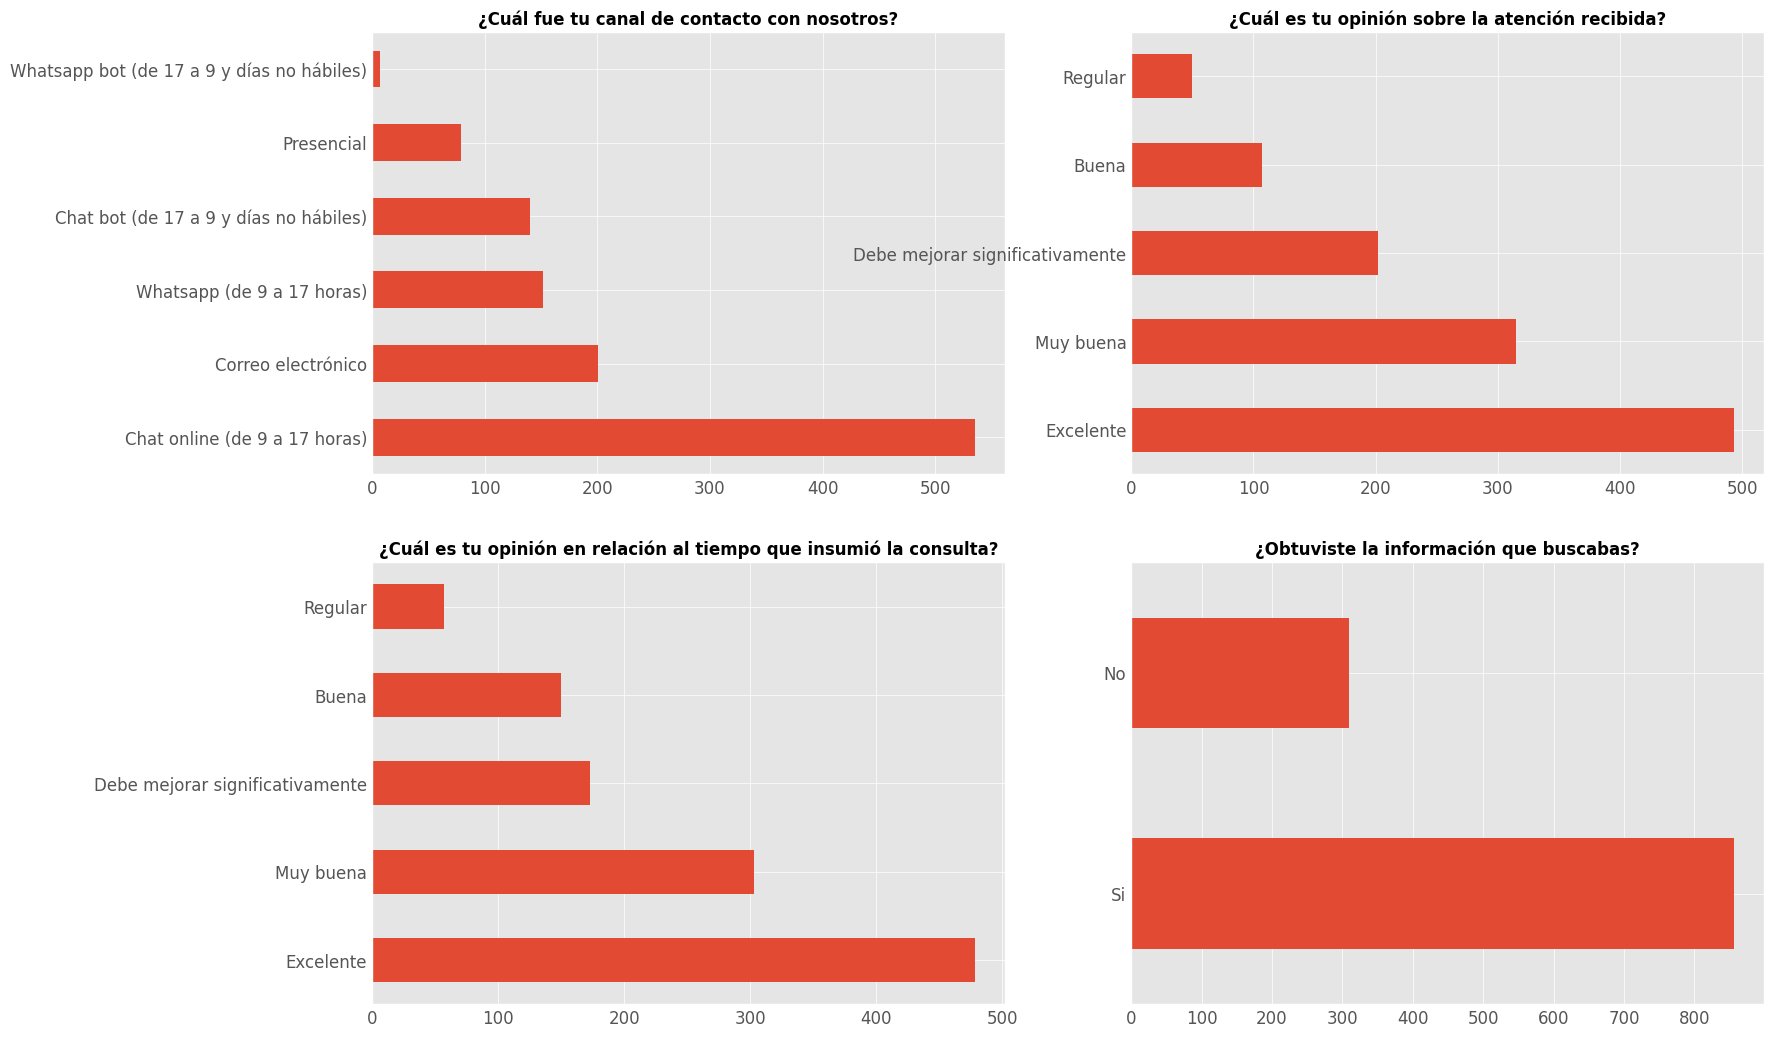

In [20]:
 
grafico_categorias_encuestas = df_encuestas.drop(columns =['Número de serie','Submitted Time','Correo electrónico','¿Tenés otros comentarios, sugerencias u observaciones sobre el servicio recibido?'],axis=1)

graficos_eda_categoricos(grafico_categorias_encuestas.select_dtypes('O'))


####**INTERPRETACIÓN:**

En esta visualización se muestran todas las cantidades de los resultados de cada variable categorica de las encuestas enviadas luego de cada conversación. En lineas general las respuestas son positivas. El unico problema a resolver es el universo encuestado. Es decir, la cantidad de encuestas solo son 1000, mientras que el total de casos supera los 20.000. Por lo tanto las encuestas no garantizan ser una retroalimentación de un buen servicio. Por lo tanto, para futuros analisis se establecera un indicador de re-consulta o si la persona tuvo que comunicarse muchas veces para resolver su consulta. Ya que al ser un canal de atención primaria, no tenemos consultas frecuentes de una misma persona. Estas luego resuelven su consulta en el area tecnica o oficina en cuestion. 

##**5. Calidad del servicio segun observaciones**<a name="id5"></a>



<Axes: xlabel='Control de conversaciones', ylabel='count'>

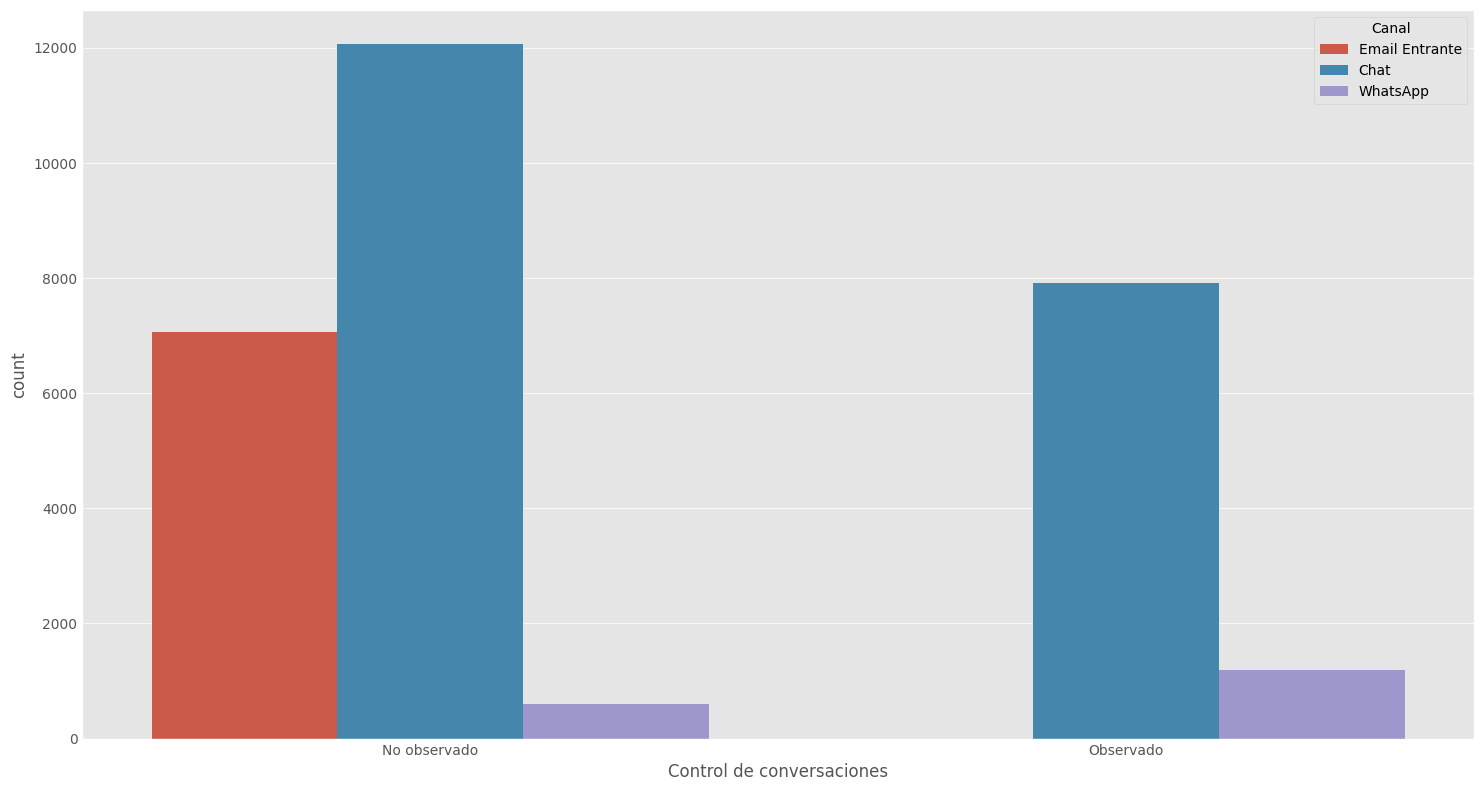

In [11]:
graf_y = df_casos_final['Control de conversaciones']
graf_x = df_casos_final['Canal']
sns.countplot(x=graf_y, hue = graf_x) 



In [9]:
df_recuperados = df_casos_final[['Control de conversaciones','Envio Correo','Envio encuesta','Realizo re-consulta']]
filtro_observado2 = df_recuperados['Control de conversaciones'] == 'Observado'
df_recuperados  = df_recuperados[filtro_observado2]
df_recuperados = df_recuperados.replace('NaN',"no")


pd.crosstab(index=df_recuperados['Control de conversaciones'],
            columns=df_recuperados['Realizo re-consulta'], margins=True)



Realizo re-consulta,no,si,All
Control de conversaciones,,,
Observado,4109,4998,9107
All,4109,4998,9107


In [10]:
agrupacion2 = df_recuperados.groupby(['Control de conversaciones']).agg({'Envio Correo': 'count', 'Envio encuesta': 'count','Control de conversaciones':'count'})
agrupacion2 

,Envio Correo,Envio encuesta,Control de conversaciones
Control de conversaciones,,,
Observado,1910,563,9107


<Axes: xlabel='count', ylabel='Tipo'>

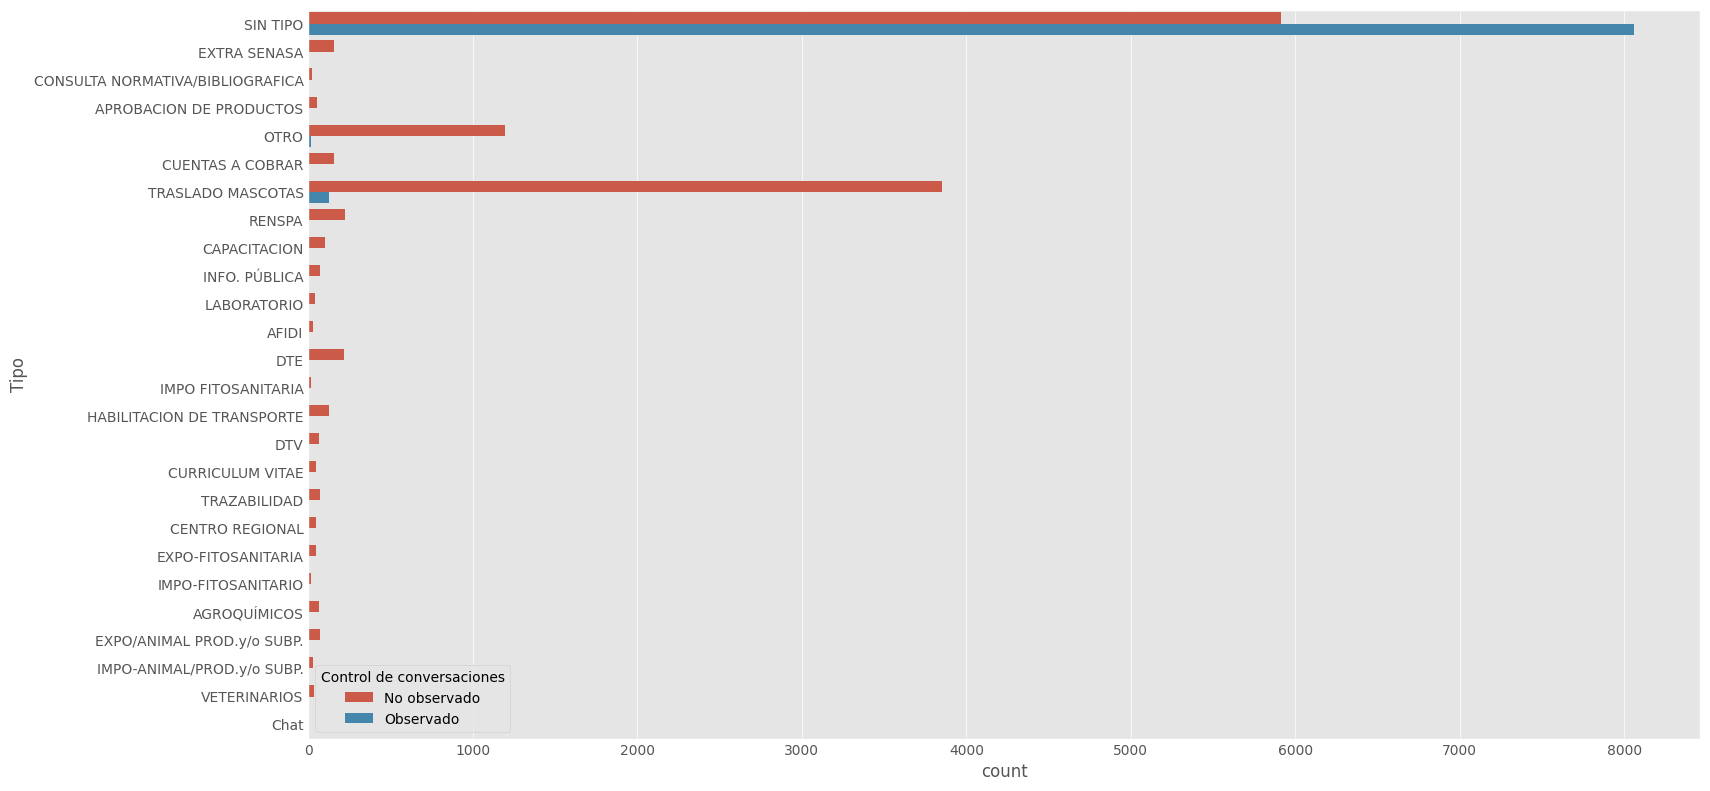

In [8]:
graf_barra_tipo = df_casos_final[['Tipo','Control de conversaciones','Canal']]
lista_excluirgrafico = ['NO RECIBIDO','CHAT SUSPENDIDO','NO INFORMA TEMA']
filtro_email4 = graf_barra_tipo ['Canal'] != 'Email Entrante' 
graf_barra_tipo  = graf_barra_tipo[filtro_email4] 
graf_barra_tipo = graf_barra_tipo [~graf_barra_tipo ['Tipo'].isin(lista_excluirgrafico)]


sns.countplot(y= graf_barra_tipo['Tipo'], hue=graf_barra_tipo['Control de conversaciones'])


####**Interpretación**:

Nuestra pregunta o hipotesis fundamental era poder determinar si hubo una demanda real de la necesidad de implemetar este servicio. Segun se pudo ver esto se confirmo. Ahora bien, respecto a la calidad del mismo, segun lo analizado hasta aqui se comprueba en primera instancia que la mitad de las conservaciones por chat y WhatsApp fuero observadas. Es decir, la persona no obtuvo la respuesta o se fue ante una respuesta incorrecta. 

En consecuencia, ante la alta cantidad de observados es necesario monitorear los casos recuperados. Es decir,cuantos de los casos observados volvieron  y se le pudo dar respuesta. En este sentido de los 9107 casos observados, que son la mitad de las conversaciones atendidas por operadores, el mas de la mitad (5636 de casos) de los mismos se volvio a comunicar, envio encuesta (la cual si fue negativa se responde e indaga) o envio correo a responde@senasa.gob.ar para que le respondan.  

Finalmente se detecta como no conformidad grave que este error de observación por chat suspedido o abandonado origina tambien un error en la tipificación de conversaciones. Las cuales en su amplia mayoria estan como "SIN TIPO" a pesar que se trato de encontrar tipificación mediante metodos de texto o string. De este modo ante la falta del dato no se puede analizar si el origen de la observación esta relacionado a la tipificación tematica de la conversación. 

En conclusión, para analizar las observaciones se procedera a utilizar variables cuantitativas y no categoricas ante la falta de datos.

##**6. Analisis cuantitativo de las observaciones**<a name="id6"></a>

##**Analisis de los observados segun el tiempo de respuesta y la cantidad de casos**

<Axes: ylabel='Tiempo de espera primera respuesta (en min)'>

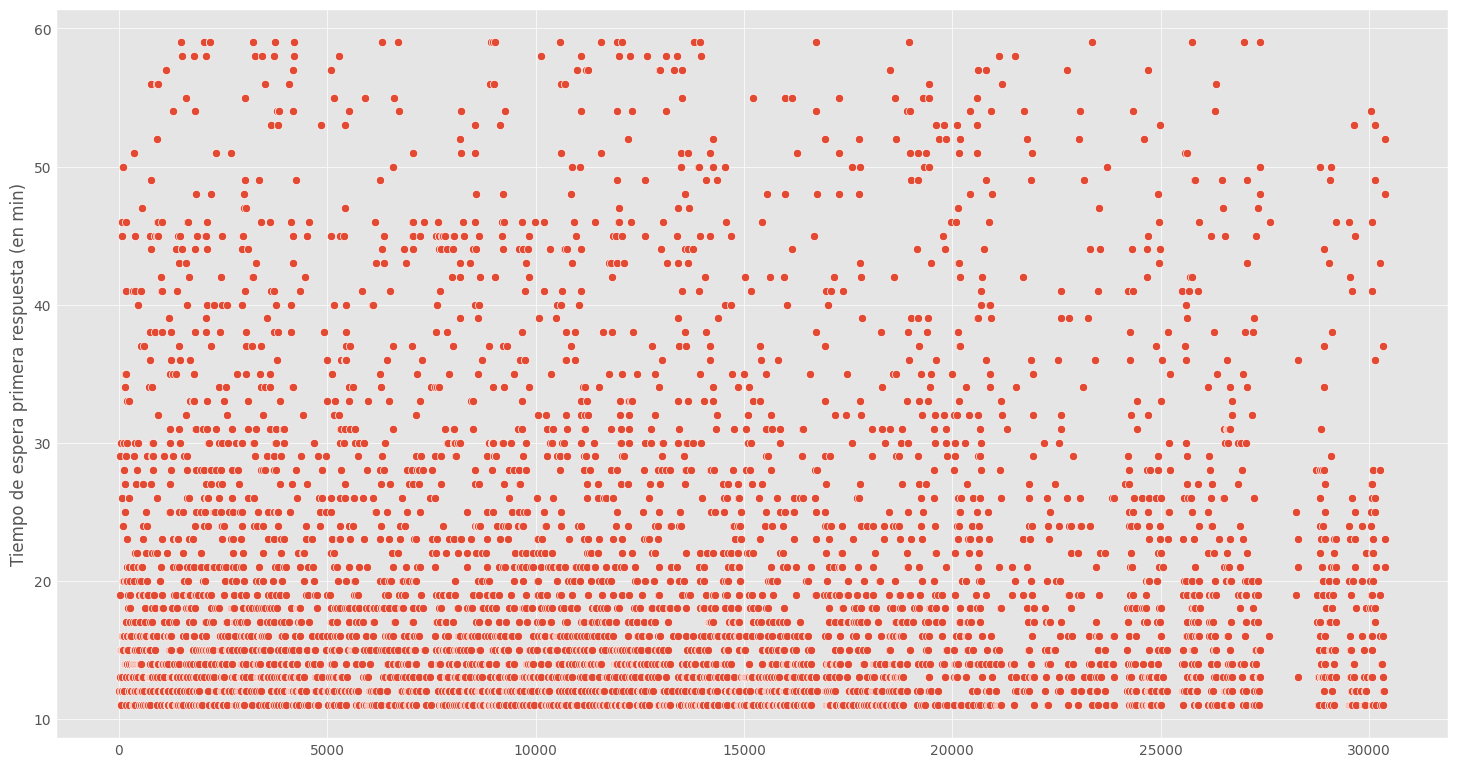

In [7]:
filtro = (df_casos_final['Tiempo de espera primera respuesta (en min)']< 60) & (df_casos_final['Tiempo de espera primera respuesta (en min)']>10)
df_graf_dispersion2 = df_casos_final[filtro]

sns.scatterplot(data=df_graf_dispersion2, y='Tiempo de espera primera respuesta (en min)', x=df_graf_dispersion2.index)

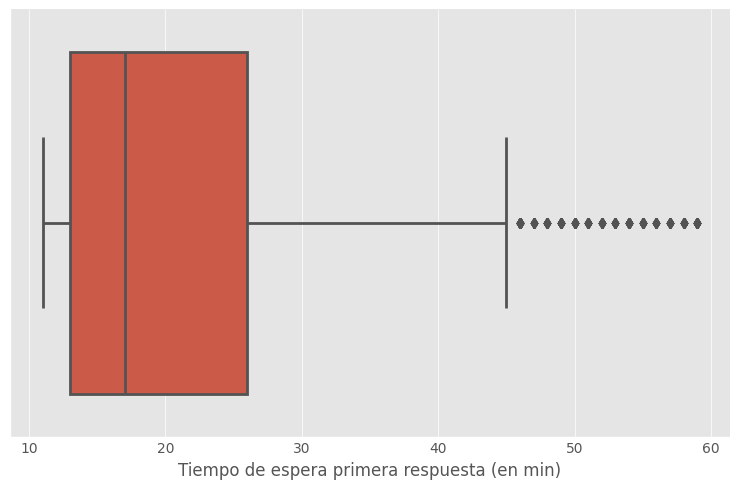

In [21]:
sns.catplot(x = 'Tiempo de espera primera respuesta (en min)', data = df_graf_dispersion2, kind = "box", aspect = 1.5)

####**INTERPRETACIÓN:**

En el siguente grafico se visualiza la distribución del tiempo de primera respuesta, como a su vez la relación si ante mas casos mas se tarda en dar primera respuesta. Aqui se puede ver como el aumento de la demanda genero mas espera en la ciudadania.

En primera instancia el boxplot indica como la media entre el primer cuartil y el tercero esta entre 15 y 30 minutos. Lo cual, ya hace referencia a un mal servicio ante la alta espera.

Ante la espera la persona abandona la conversación y si utilizo el canal de chat en linea ya no permite continuar la conversación. Caso contrario sucede con el whatsapp. Este se refleja en el grafico de barras analizado anteriormente. 




##**Analisis de los observados segun cantidad de mensajes, tiempo de resolución y casos observados por abandono**

<Axes: xlabel='Cantidad de palabras por conversación'>

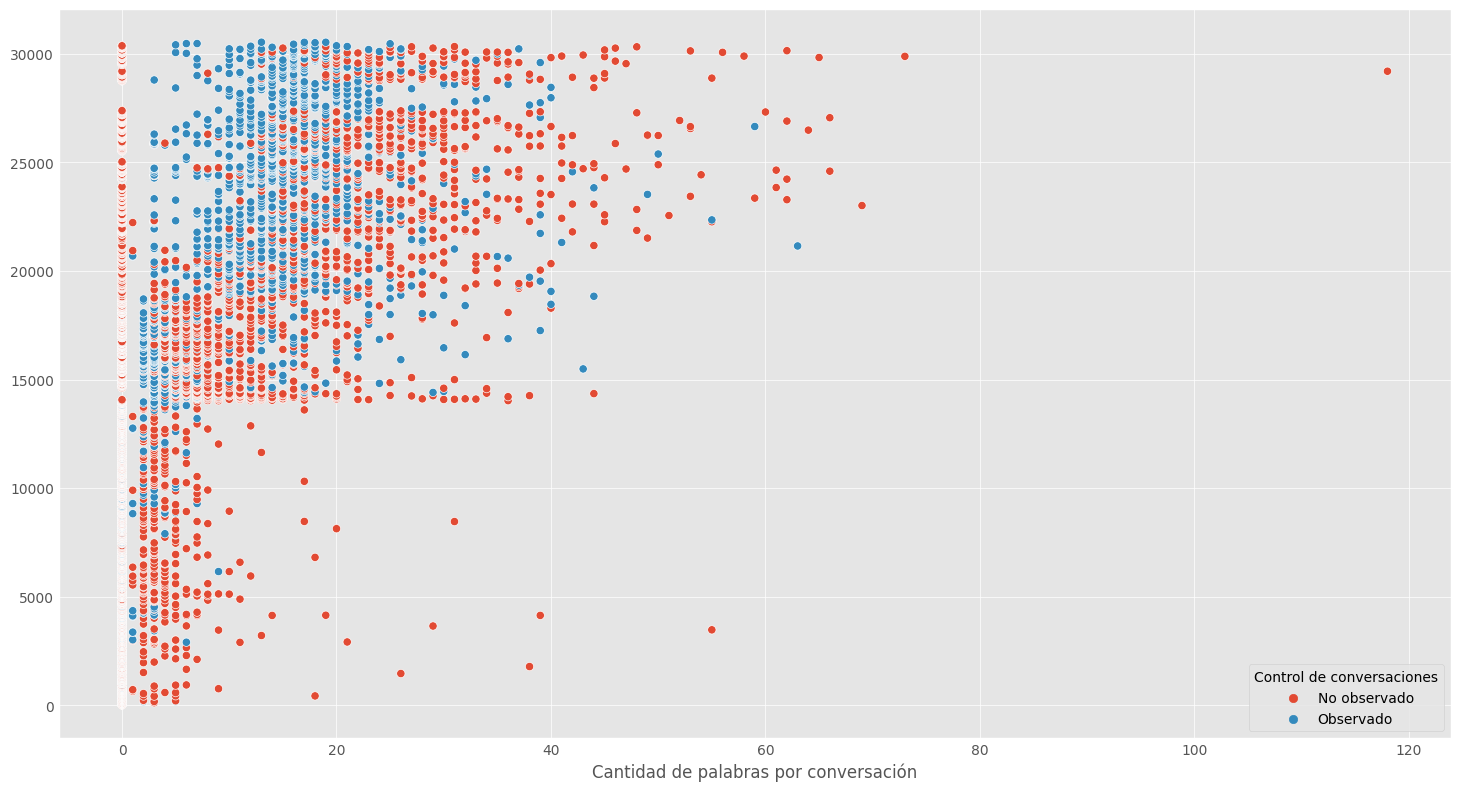

In [23]:
sns.scatterplot(x ='Cantidad de palabras por conversación' , y = df_analisis_obs4.index, hue = 'Control de conversaciones',data = df_analisis_obs4)

####**INTERPRETACIÓN:**

A modo de sintesis de lo analizado anteriormente, se vio como hay muchos casos observados por abandono por demora del agente en dar su primera respuesta. Esta cantidad de casos no es parte del total, pero si un valor siginificativo en el canal de chat en linea (el Whatsapp permite comunicación constante y el correo no hay posibilidad de desconexción). 

En estos otros 2 graficos se plantea relacionar el aumento de demanda de casos con la cantidad de mensajes y de tiempo de resolución. Todo esto segmentado segun observación o no. Un detalle a descatar es que la distribución de los puntos muestran una alta cantidad de observados en conversaciones que superaron los 10 mensajes. Es decir, no solo hay un problema de espera, sino que no se esta siendo asertivo en la indagación a la persona que se contacta y no le sirve el bot y pide hablar con un operador. Es decir, se debe analizar los tipos de conversaciones para gestionar el conocimiento. Sin embargo al ver los datos hay varios sin tipficar a mejorar la limpieza. 






##**Analisis de los observados segun correlación Pearson**

In [22]:

df_analisis_obs = df_casos_final[['Canal','Cantidad de palabras por conversación','Tiempo de resolución del caso (en min)','Tiempo de espera primera respuesta (en min)','Control de conversaciones']]
filtro_espera = (df_analisis_obs['Tiempo de espera primera respuesta (en min)']< 60) & (df_casos_final['Tiempo de espera primera respuesta (en min)']>1)
filtro_resolucion = (df_analisis_obs['Tiempo de resolución del caso (en min)']< 60) & (df_casos_final['Tiempo de resolución del caso (en min)']>1)
filtro_email3 = df_analisis_obs['Canal'] != 'Email Entrante' 
df_analisis_obs2 = df_analisis_obs[filtro_email3] 
df_analisis_obs3 = df_analisis_obs[filtro_espera]
df_analisis_obs4= df_analisis_obs2[filtro_resolucion]

df_analisis_obs4

,Canal,Cantidad de palabras por conversación,Tiempo de resolución del caso (en min),Tiempo de espera primera respuesta (en min),Control de conversaciones
10,Chat,0,13.0,12.0,No observado
11,Chat,0,6.0,6.0,No observado
12,Chat,0,9.0,9.0,No observado
15,Chat,0,15.0,15.0,No observado
18,Chat,0,8.0,8.0,No observado
...,...,...,...,...,...
30478,WhatsApp,7,2.0,0.0,Observado
30517,Chat,18,6.0,0.0,Observado
30534,Chat,17,2.0,0.0,Observado
30537,Chat,19,2.0,0.0,Observado


In [24]:
graf_correlacion = df_casos_final[['Canal','Cantidad de palabras por conversación','Tiempo de espera primera respuesta (en min)','Tiempo de resolución del caso (en min)','Tiempo de espera asignación (en min)','Control de conversaciones']]
filtro_observado = graf_correlacion['Control de conversaciones'] == 'Observado'
graf_correlacion2 = graf_correlacion[filtro_observado]
filtro_email5 = graf_correlacion ['Canal'] != 'Email Entrante' 
filtro_tiempo = (graf_correlacion['Tiempo de resolución del caso (en min)']< 60) & (graf_correlacion['Tiempo de resolución del caso (en min)']>1)
graf_correlacion = graf_correlacion[filtro_tiempo]
graf_correlacion  = graf_correlacion[filtro_email5] 
graf_correlacion2.corr(method='pearson')

,Cantidad de palabras por conversación,Tiempo de espera primera respuesta (en min),Tiempo de resolución del caso (en min),Tiempo de espera asignación (en min)
Cantidad de palabras por conversación,1.000000,0.011455,-0.152997,0.103288
Tiempo de espera primera respuesta (en min),0.011455,1.000000,-0.006657,0.010848
Tiempo de resolución del caso (en min),-0.152997,-0.006657,1.000000,-0.005913
Tiempo de espera asignación (en min),0.103288,0.010848,-0.005913,1.000000


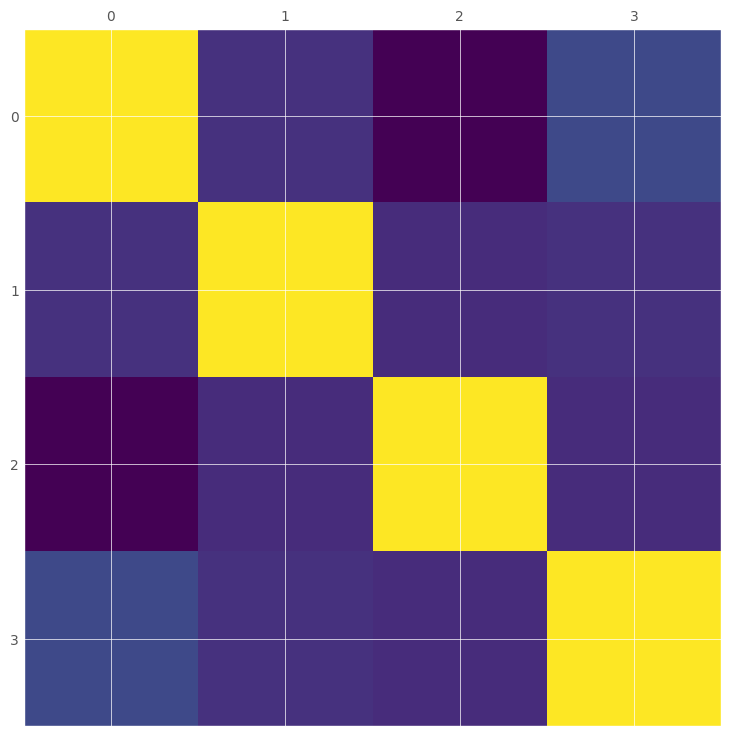

In [25]:
plt.matshow(graf_correlacion2.corr(method='pearson'))

####**INTERPRETACIÓN:**

El ultimo analisis cuantitativo de las observaciones se realiza mediante un coeficiente de correlación de Pearson, cuya prueba permite descubrir una relación directa/lineal entre dos variables continuas. Es decir, cual es la covarianza en conjunto de 2 variables.

El resultado de los graficos seran intervalos [-1,1], estableciendo el signo el sentido de la relación, y la interpretación de cada resultado es el siguiente:

- Si r = 1: Correlación positiva perfecta. El índice refleja la dependencia total entre ambas dos variables, la que se denomina relación directa: cuando una de las variables aumenta, la otra variable aumenta en proporción constante.

- Si 0 < y < 1: Refleja que se da una correlación positiva. Si r = 0: En este caso no hay una relación lineal. Aunque no significa que las variables sean independientes, ya que puede haber relaciones no lineales entre ambas variables.

- Si -1 < y < 0: Indica que existe una correlación negativa.

- Si r = -1: Indica una correlación negativa perfecta y una dependencia total entre ambas variables lo que se conoce como “relación inversa”, que es cuando una de las variables aumenta, la otra variable en cambio disminuye en proporción constante.

En el grafico generado no se visualizan corrlaciones lineales fuertes. El mas alto es el de 0,10 entre espera de asignación y cantidad de palabras. 

##**7. Auditoria de casos**<a name="id7"></a>

Luego de finalizar el estado de situación de la demanda, la calidad de servicio ofrecida y el analisis de los motivos de las observaciones encontradas. Se procede a utilizar algoritmos de Machine Learning que permitan planificar auditorias sobre las conversaciones diarias. Es decir, que una persona tome como referencia los resultados de estos apredizajes supervizados y le ayude a determinar que casos auditar y no realizar un muestreo azaroso. 

##**7.1 Uso de Clustering kmeans para clasificación**

In [54]:

df_casos_final_kmeans = df_casos_final[['Canal','Cantidad de palabras por conversación','Tiempo de resolución del caso (en min)','Tiempo de espera primera respuesta (en min)','Control de conversaciones']]
filtro_email5 = df_casos_final_kmeans ['Canal'] != 'Email Entrante' 
df_casos_final_kmeans  = df_casos_final_kmeans[filtro_email5] 
filtro_tiempo = (df_casos_final_kmeans['Tiempo de resolución del caso (en min)']< 60) & (df_casos_final_kmeans['Tiempo de resolución del caso (en min)']>1)
df_casos_final_kmeans = df_casos_final_kmeans[filtro_tiempo]
filtro_tiempo2 = (df_casos_final_kmeans['Tiempo de espera primera respuesta (en min)']< 60)
df_casos_final_kmeans = df_casos_final_kmeans[filtro_tiempo2]
df_casos_final_kmeans = df_casos_final_kmeans.drop(columns = ['Canal'], axis=1)








In [56]:
# Pasamos el las categorias a dummies

df_kmeans=pd.get_dummies(df_casos_final_kmeans, columns=['Control de conversaciones'])

# Normalizamos las columnas numericas
df_kmeans["Cantidad de palabras por conversación"] = (df_kmeans["Cantidad de palabras por conversación"] - df_kmeans["Cantidad de palabras por conversación"].min()) / (df_kmeans["Cantidad de palabras por conversación"].max() - df_kmeans["Cantidad de palabras por conversación"].min())
df_kmeans["Tiempo de resolución del caso (en min)"] = (df_kmeans["Tiempo de resolución del caso (en min)"] - df_kmeans["Tiempo de resolución del caso (en min)"].min()) / (df_kmeans["Tiempo de resolución del caso (en min)"].max() - df_kmeans["Tiempo de resolución del caso (en min)"].min())
df_kmeans["Tiempo de espera primera respuesta (en min)"] = (df_kmeans["Tiempo de espera primera respuesta (en min)"] - df_kmeans["Tiempo de espera primera respuesta (en min)"].min()) / (df_kmeans["Tiempo de espera primera respuesta (en min)"].max() - df_kmeans["Tiempo de espera primera respuesta (en min)"].min())

df_kmeans

,Cantidad de palabras por conversación,Tiempo de resolución del caso (en min),Tiempo de espera primera respuesta (en min),Control de conversaciones_No observado,Control de conversaciones_Observado
10,0.000000,0.192982,0.203390,1,0
11,0.000000,0.070175,0.101695,1,0
12,0.000000,0.122807,0.152542,1,0
15,0.000000,0.228070,0.254237,1,0
18,0.000000,0.105263,0.135593,1,0
...,...,...,...,...,...
30478,0.059322,0.000000,0.000000,0,1
30517,0.152542,0.070175,0.000000,0,1
30534,0.144068,0.000000,0.000000,0,1
30537,0.161017,0.000000,0.000000,0,1


####**Clustering: Cant. palabras - Tiempo resolución**

In [57]:

c1 = "Cantidad de palabras por conversación"
c2 = "Tiempo de resolución del caso (en min)"


inercias = []
for n in range(1, 11):
    km = KMeans(n_clusters=n, init='k-means++', random_state=42)
    km.fit(df_kmeans[[c1, c2]])
    inercias.append(km.inertia_)

inercias
# Inercia: Suma de las distancias al cuadrado de los puntos a su centroide más cercano

[500.02066060062356,
 187.0665750030054,
 119.2017495274246,
 92.8252402067794,
 72.56408798926465,
 58.671713606506074,
 47.93311005416061,
 41.1775265043692,
 36.06191968623453,
 32.1020085245449]

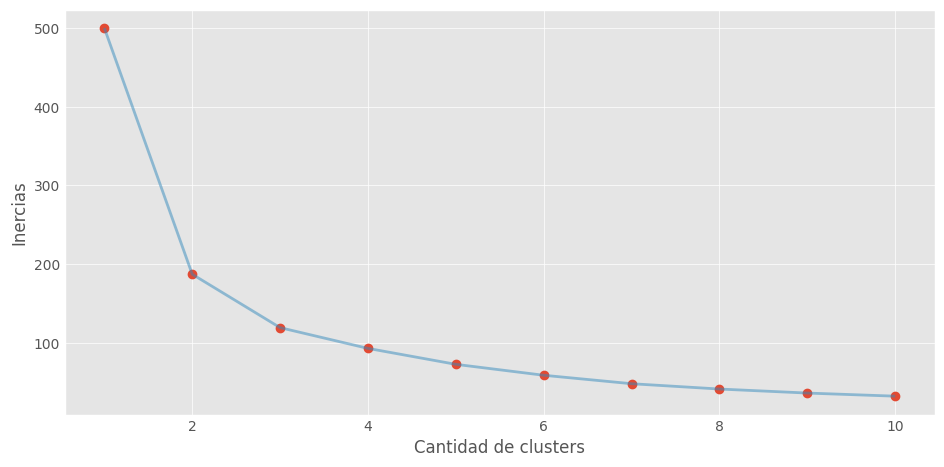

In [58]:
# Graficamos la curva de inercias para ver el codo
plt.figure(1, figsize=(10, 5))
plt.plot(range(1, 11) , inercias , 'o')
plt.plot(range(1, 11) , inercias , '-' , alpha=0.5)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Inercias')
plt.show()

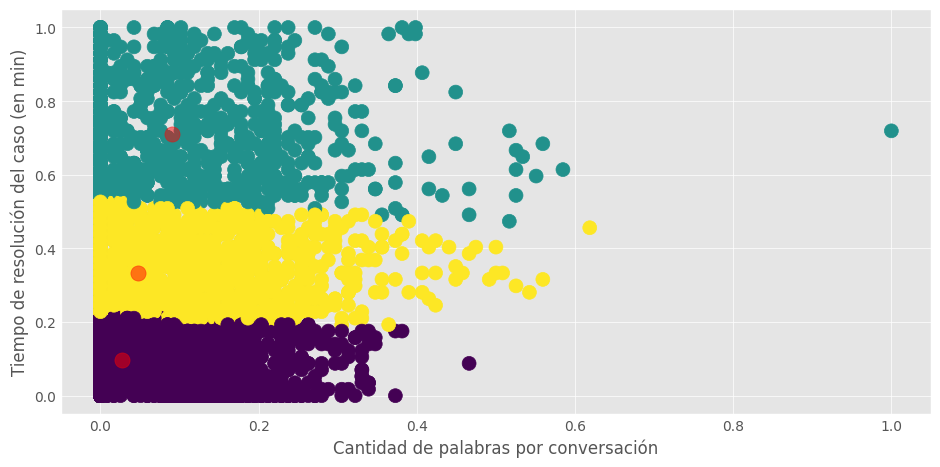

In [59]:
# Tomamos k=3 y entrenamos
k = 3
km = KMeans(n_clusters=k, init='k-means++', random_state=42)
km.fit(df_kmeans[[c1, c2]])

labels = km.labels_
centroids = km.cluster_centers_

# Graficamos
plt.figure(1, figsize=(10, 5))
plt.scatter(x=c1, y=c2, data=df_kmeans[[c1, c2]], c=labels, s=100)
plt.scatter(x=centroids[:, 0] , y=centroids[:, 1], s=120 , c="red", alpha=0.5)
plt.xlabel(c1)
plt.ylabel(c2)
plt.show()

In [60]:
#agregar al df sin normalizar
df_casos_final_kmeans['Cant. palabras - Tiempo resolución']= labels


####**Clustering: Cant. palabras - Tiempo Asignación**

In [61]:

c1 = "Cantidad de palabras por conversación"
c3 = "Tiempo de espera primera respuesta (en min)"


inercias = []
for n in range(1, 11):
    km = KMeans(n_clusters=n, init='k-means++', random_state=42)
    km.fit(df_kmeans[[c1, c3]])
    inercias.append(km.inertia_)

inercias
# Inercia: Suma de las distancias al cuadrado de los puntos a su centroide más cercano

[279.8496959103062,
 142.36625291321596,
 101.75988485726758,
 71.17111508280797,
 55.56872496855037,
 43.19099310840792,
 36.80718402575395,
 31.453702953451224,
 27.589581529651966,
 24.737281747893206]

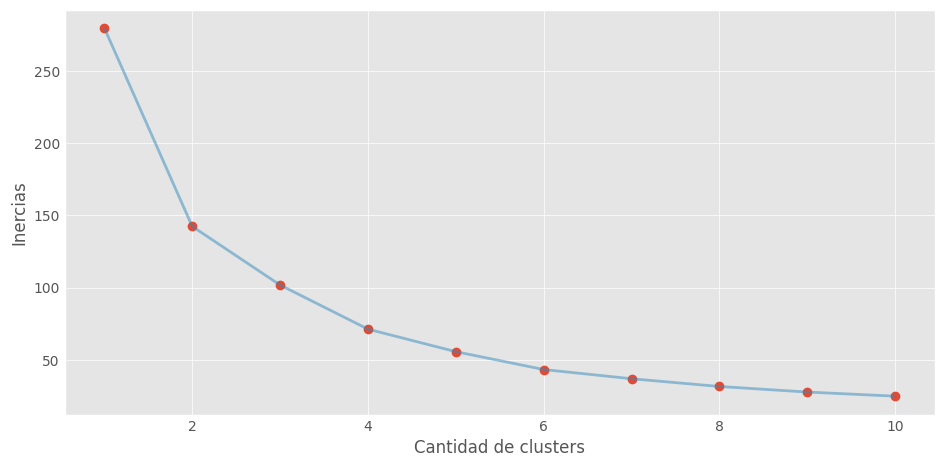

In [62]:
# Graficamos la curva de inercias para ver el codo
plt.figure(1, figsize=(10, 5))
plt.plot(range(1, 11) , inercias , 'o')
plt.plot(range(1, 11) , inercias , '-' , alpha=0.5)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Inercias')
plt.show()

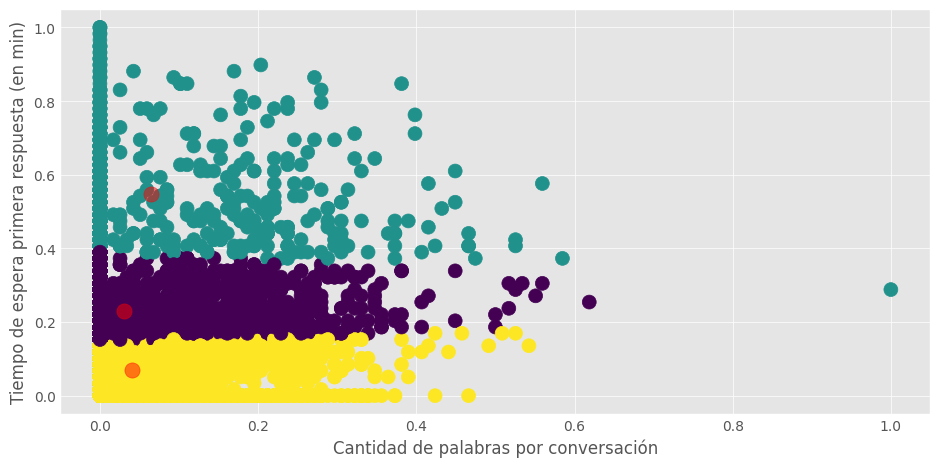

In [63]:
# Tomamos k=3 y entrenamos
k = 3
km = KMeans(n_clusters=k, init='k-means++', random_state=42)
km.fit(df_kmeans[[c1, c3]])

labels2 = km.labels_
centroids = km.cluster_centers_

# Graficamos
plt.figure(1, figsize=(10, 5))
plt.scatter(x=c1, y=c3, data=df_kmeans[[c1, c3]], c=labels2, s=100)
plt.scatter(x=centroids[:, 0] , y=centroids[:, 1], s=120 , c="red", alpha=0.5)
plt.xlabel(c1)
plt.ylabel(c3)
plt.show()

In [64]:
df_casos_final_kmeans['Cant. palabras - Tiempo Asignación']= labels2


####**Clustering: Tiempo de resolución - Tiempo primera respuesta**

In [65]:
c2 = "Tiempo de resolución del caso (en min)"
c3 = "Tiempo de espera primera respuesta (en min)"


inercias = []
for n in range(1, 11):
    km = KMeans(n_clusters=n, init='k-means++', random_state=42)
    km.fit(df_kmeans[[c2, c3]])
    inercias.append(km.inertia_)

inercias
# Inercia: Suma de las distancias al cuadrado de los puntos a su centroide más cercano

[657.9473130501127,
 279.45269768110245,
 190.66304913389746,
 132.63434211246482,
 100.61432192830088,
 82.22198172826319,
 67.39396309938448,
 58.88669416917759,
 50.85316646463895,
 45.678224246265565]

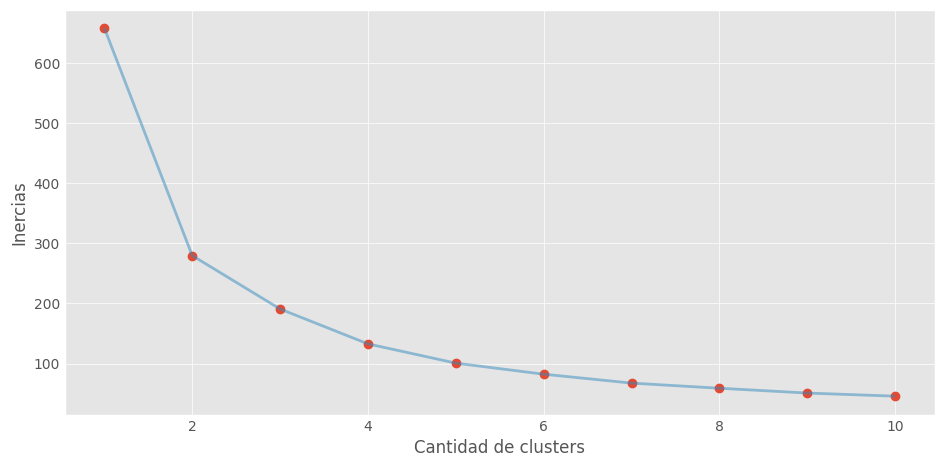

In [66]:
# Graficamos la curva de inercias para ver el codo
plt.figure(1, figsize=(10, 5))
plt.plot(range(1, 11) , inercias , 'o')
plt.plot(range(1, 11) , inercias , '-' , alpha=0.5)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Inercias')
plt.show()

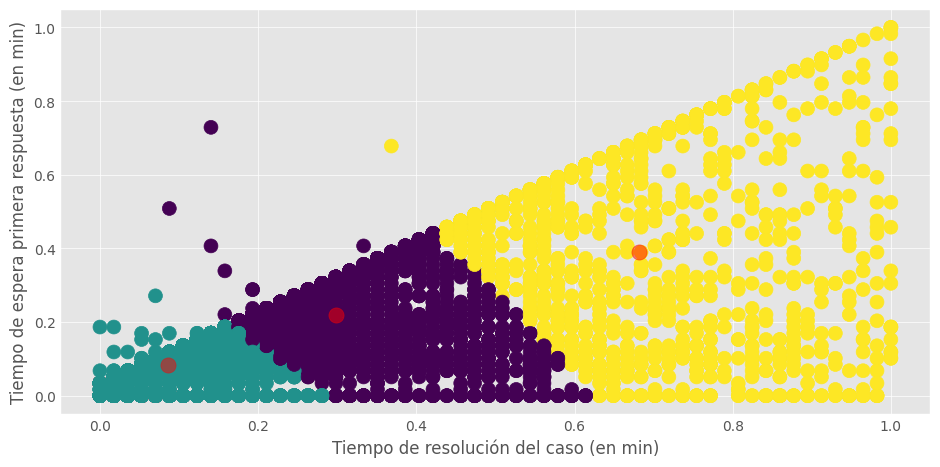

In [67]:
# Tomamos k=3 y entrenamos
k = 3
km = KMeans(n_clusters=k, init='k-means++', random_state=42)
km.fit(df_kmeans[[c2, c3]])

labels3 = km.labels_
centroids = km.cluster_centers_

# Graficamos
plt.figure(1, figsize=(10, 5))
plt.scatter(x=c2, y=c3, data=df_kmeans[[c2, c3]], c=labels3, s=100)
plt.scatter(x=centroids[:, 0] , y=centroids[:, 1], s=120 , c="red", alpha=0.5)
plt.xlabel(c2)
plt.ylabel(c3)
plt.show()

##**7.1.1 Uso de Clustering kmeans para clasificación**

In [68]:
#Tabla final con los 3 kmeas realizados

df_casos_final_kmeans['Tiempo de resolución - Tiempo Asignación']= labels3
df_casos_final_kmeans

,Cantidad de palabras por conversación,Tiempo de resolución del caso (en min),Tiempo de espera primera respuesta (en min),Control de conversaciones,Cant. palabras - Tiempo resolución,Cant. palabras - Tiempo Asignación,Tiempo de resolución - Tiempo Asignación
10,0,13.0,12.0,No observado,0,0,0
11,0,6.0,6.0,No observado,0,2,1
12,0,9.0,9.0,No observado,0,0,1
15,0,15.0,15.0,No observado,2,0,0
18,0,8.0,8.0,No observado,0,2,1
...,...,...,...,...,...,...,...
30478,7,2.0,0.0,Observado,0,2,1
30517,18,6.0,0.0,Observado,0,2,1
30534,17,2.0,0.0,Observado,0,2,1
30537,19,2.0,0.0,Observado,0,2,1


In [73]:
#Agrupación de niveles de kmeas clasficados segun el criterio de Tiempo de resolución - Tiempo Asignación

agrupacion_kmeas3 = df_casos_final_kmeans.groupby(['Tiempo de resolución - Tiempo Asignación','Control de conversaciones']).agg({'Tiempo de resolución del caso (en min)': 'mean' ,'Tiempo de espera primera respuesta (en min)': 'mean','Control de conversaciones':'count' })
agrupacion_kmeas3

Tiempo de resolución del caso (en min)  \
Tiempo de resolución - Tiempo Asignación Control de conversaciones                                           
0                                        No observado                                            18.496194   
                                         Observado                                               23.560976   
1                                        No observado                                             7.395785   
                                         Observado                                                5.361253   
2                                        No observado                                            40.072043   
                                         Observado                                               44.834254   

                                                                    Tiempo de espera primera respuesta (en min)  \
Tiempo de resolución - Tiempo Asignación Control de conversaciones                                                
0                                        No observado                                                 13.719826   
                                         Observado                                                     6.182927   
1                                        No observado                                                  6.043006   
                                         Observado                                                     1.347414   
2                                        No observado                                                 25.354839   
                                         Observado                                                    10.635359   

                                                                    Control de conversaciones  
Tiempo de resolución - Tiempo Asignación Control de conversaciones                             
0                                        No observado                                    2759  
                                         Observado                                        328  
1                                        No observado                                    4697  
                                         Observado                                       1373  
2                                        No observado                                     930  
                                         Observado                                        181

In [70]:
#Agrupación de niveles de kmeas clasficados segun el criterio de Cant. palabras - Tiempo resolución

agrupacion_kmeas1 = df_casos_final_kmeans.groupby(['Cant. palabras - Tiempo resolución','Control de conversaciones']).agg({'Cantidad de palabras por conversación': 'mean', 'Tiempo de resolución del caso (en min)': 'mean' ,'Control de conversaciones':'count'})
agrupacion_kmeas1

Cantidad de palabras por conversación  \
Cant. palabras - Tiempo resolución Control de conversaciones                                          
0                                  No observado                                            1.520686   
                                   Observado                                              10.268165   
1                                  No observado                                           10.718112   
                                   Observado                                              10.376147   
2                                  No observado                                            5.223614   
                                   Observado                                               8.164134   

                                                              Tiempo de resolución del caso (en min)  \
Cant. palabras - Tiempo resolución Control de conversaciones                                           
0                                  No observado                                             8.062989   
                                   Observado                                                5.005993   
1                                  No observado                                            42.335459   
                                   Observado                                               43.247706   
2                                  No observado                                            20.831395   
                                   Observado                                               21.559271   

                                                              Control de conversaciones  
Cant. palabras - Tiempo resolución Control de conversaciones                             
0                                  No observado                                    5366  
                                   Observado                                       1335  
1                                  No observado                                     784  
                                   Observado                                        218  
2                                  No observado                                    2236  
                                   Observado                                        329

In [71]:
#Agrupación de niveles de kmeas clasficados segun el criterio de Cant. palabras - Tiempo Asignación

agrupacion_kmeas2 = df_casos_final_kmeans.groupby(['Cant. palabras - Tiempo Asignación','Control de conversaciones']).agg({'Cantidad de palabras por conversación': 'mean','Tiempo de espera primera respuesta (en min)': 'mean','Control de conversaciones':'count' })
agrupacion_kmeas2

Cantidad de palabras por conversación  \
Cant. palabras - Tiempo Asignación Control de conversaciones                                          
0                                  No observado                                            3.383731   
                                   Observado                                               8.223602   
1                                  No observado                                            7.564470   
                                   Observado                                               9.775000   
2                                  No observado                                            2.687286   
                                   Observado                                              10.077930   

                                                              Tiempo de espera primera respuesta (en min)  \
Cant. palabras - Tiempo Asignación Control de conversaciones                                                
0                                  No observado                                                 13.517992   
                                   Observado                                                    13.031056   
1                                  No observado                                                 32.318052   
                                   Observado                                                    33.425000   
2                                  No observado                                                  5.148368   
                                   Observado                                                     1.408685   

                                                              Control de conversaciones  
Cant. palabras - Tiempo Asignación Control de conversaciones                             
0                                  No observado                                    3307  
                                   Observado                                        161  
1                                  No observado                                     698  
                                   Observado                                         40  
2                                  No observado                                    4381  
                                   Observado                                       1681

####**INTERPRETACIÓN:**

El uso de Clustering Kmeans nos permitio identificar grupos segun las variables cuantitativas que poseemos. Estas variables de tiempo se filtraton segun valores normales de una conversación que en el dia cotidiano no dura mas de 1 hora. De este modo se quitaron los errores operativos. Por ejemplo, dejar un caso todo el dia sin cerrar hasta que pasadas las 24 hs se cierra automaticamente. 

De los grupos identificados **tomamos los que esten discrimados como observados** y tomamos sus valores promedios normales segun el grupo, para seleccionar que conversaciones auditar. Obsivamente si la conversaciones tiene valores outlier fuera de estas condiciones normales de tiempo, se procede automaticamente a su revision, como tambien si no tienen la tipificación como se dijo anteriormente. Pero, en caso de la gran mayoria, estos criterios de segmentación nos permiten reducir factres de elccion azarosa. 

A su vez, se sugerie siguendo el analisis realizado en los graficos de dispersión, tener en cuenta las cuestiones de cantidad de palbras y tiempo de primera respuesta.




	

##**7.2 Regresión Lineal de observados** 

A continuación se utiliza la regresión lineal multiple para indicar la tendencia que poseen los datos. Es decir, la relación entre una variable  dependiente y varias variables explicativas/explicativa. En este caso la variable dependiente a predecir son la cantidad de casos observados y la independiente/explicativa son la cantidad de mensajes y tiempos. 

El objetivo de esto tener una herramienta predictiva para saber si a ciertos valores promedios que se repiten que cantidad de observados se espera tener y tratar de mejorar el servicio para evitarlo preventivamente. 

In [80]:
df_casos_final_regresion = df_casos_final[['Canal','Tipo','Cantidad de palabras por conversación','Tiempo de resolución del caso (en min)','Tiempo de espera primera respuesta (en min)','Control de conversaciones']]
filtro_email5 = df_casos_final_regresion ['Canal'] != 'Email Entrante' 
df_casos_final_regresion  = df_casos_final_regresion[filtro_email5] 
filtro_tiempo = (df_casos_final_regresion['Tiempo de resolución del caso (en min)']< 60) & (df_casos_final_regresion['Tiempo de resolución del caso (en min)']>1)
df_casos_final_regresion = df_casos_final_regresion[filtro_tiempo]
filtro_tiempo2 = (df_casos_final_regresion['Tiempo de espera primera respuesta (en min)']< 60)
df_casos_final_regresion = df_casos_final_regresion[filtro_tiempo2]
filtro_observado = df_casos_final_regresion['Control de conversaciones'] == 'Observado'
df_casos_final_regresion  = df_casos_final_regresion[filtro_observado]
df_casos_final_regresion = df_casos_final_regresion.drop(columns = ['Canal','Tipo','Control de conversaciones'], axis=1)
df_casos_final_regresion.reset_index(drop=True, inplace=True) 
df_casos_final_regresion

,Cantidad de palabras por conversación,Tiempo de resolución del caso (en min),Tiempo de espera primera respuesta (en min)
0,2,20.0,6.0
1,5,33.0,0.0
2,0,40.0,40.0
3,0,4.0,4.0
4,0,6.0,0.0
...,...,...,...
1877,7,2.0,0.0
1878,18,6.0,0.0
1879,17,2.0,0.0
1880,19,2.0,0.0


In [79]:
x = df_casos_final_regresion[['Cantidad de palabras por conversación','Tiempo de resolución del caso (en min)','Tiempo de espera primera respuesta (en min)']]
y = df_casos_final_regresion.index


regr = linear_model.LinearRegression()
regr.fit(x, y)


LinearRegression()

In [76]:
y_pred = regr.predict(x)

# Los coeficientes
print('Coefficientes: \n', regr.coef_)
# Error cuadrático medio
print("Error cuadratico medio: %.2f" % mean_squared_error(y, y_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Varianza: %.2f' % r2_score(y, y_pred))

Coefficientes: 
 [ 38.5792574    3.03426917 -13.68263049]
Error cuadratico medio: 154889.87
Varianza: 0.48


**Metricas del modelo:** 

- El Error Cuadrático Medio es grande. Este surge la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valoresde Es decir si esta alejado de 0, peor es el modelo.

- En el caso de la varianza esta cercana a 1. Ya que esta a la mitad.


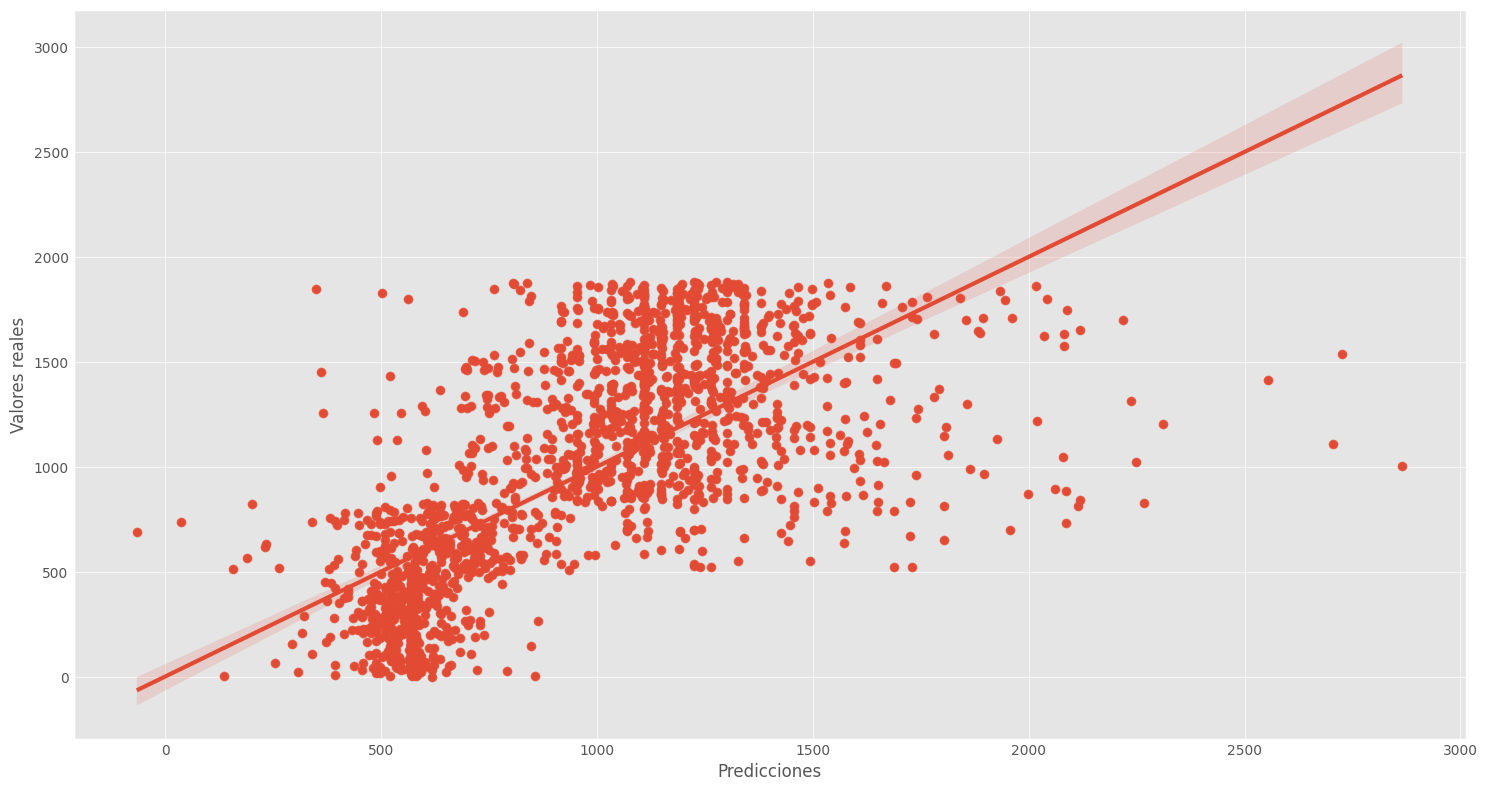

In [77]:
y_pred = regr.predict(x)

sns.scatterplot(x=y_pred, y=y)
sns.regplot(x=y_pred, y=y)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

El gráfico muestra una línea diagonal que representa la línea de regresión. Si los puntos están cerca de la línea, significa que el modelo se ajusta bien a los datos. Si los puntos están dispersos, significa que el modelo no se ajusta bien. En este caso hay algunos puntos alejados de la linea, lo cual demuestra lo explicado en el Error Cuadrático Medio.

####**Predictor de observados**

In [ ]:

cant_palabras, tiempo_resolucion, tiempo_espera = map(int, input('coloque entre espacios 3 valores promedios del mes o trimestre vencido (1- cantidad palabras,2-tiempo en minutos de resolucion,3- tiempo en minutos de espera) \n').strip().split())
print(f"fewe{regr.predict([[cant_palabras, tiempo_resolucion, tiempo_espera]])}")

##**8. Resultados finales y propuesta**<a name="id8"></a>

Hemos llegado al final de nuestra evaluación y a modo sintesis se indican los siguentes hallazagos: 

- La implementación del nuevo servicio de atención tuvo una buena recepeción y genero demanda externa por parte de la ciudadania. 

- Las encuestas de satisfacción, aunque sean una muestra pequeña reflejan una buena devolución. No es el caso del control de calidad de conservaciones observadas. 

- Se deberan implementar indicadores para controlar la calidad de las observaciones y alentar la difusión del asistente virtual. 

- Se debera estadarizar los aspectos operativos de los tiempos, en caso que los valores atipicos surgan de errores humanos. Por ejemplo, cerrar un caso tarde aunque ya este resuelto o no usar plantillas para dar una primera respuesta rapido. 

- Se debera estadarizar los aspectos operativos de las tipificaciones, para conocer mejor que cnsultas frecuentes se realizan y asi poder indigar la estadistica por tipo de tema consultado y se relacionara eso con los valores de tiempo, junto a la cantidad de mensajes. 

A modo de sugerencia para realizar un monitoreo de la calidad y de la demanda del servicio. Se establece la siguente tabla de mediciones. 

|Indicador de Seguimiento / Mediciones| |
|:----|:----|
|Porcentaje de encuestas  Encontró la información|Se contabilizan las respuestas seleccionadas en la encuesta de atención enviada|
|Porcentaje de encuestas  sobre tiempo de atención satisfactorio|Se contabilizan las respuestas seleccionadas en la encuesta de atención enviada|
|Porcentaje de encuesta  sobre atención satisfactoria|Se contabilizan las respuestas seleccionadas en la encuesta de atención enviada|
|Cantidad de atenciones realizadas|Se contabilizan la cantidad de atenciones realizadas por los distintitos canales|
|Porcentaje de eficacia del asistente virtual|Cantidad de personas que se comunicaron con el asistente virtual y no volvieron a consultar
|Porcentaje de conversaciones observadas recuperadas|Cantidad de personas que no pudieron comunicarse o abandonaron por no encontrar la información y volvieron a comunicarse por otros medios
|Promedio de conversaciones netas|Cuantas conversaciones reales se tiene por dia descartando las que tiene el asistente virtual y las observadas
|Porcentaje de conversaciones con errores operativos|Cuantas conversaciones no se cerro a tiempo o no se cargo el tipo de tema.|

